In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import warnings
import numpy as np
import matplotlib.pylab as plb
import seaborn as sns
warnings.filterwarnings('ignore')

# <span style=color:Blue>2.0 Data Analysis</span>

In [3]:
#load the dataset
df=pd.read_csv('West_Africa_temperature_1980_2022.csv')
df.head()

STATION  LATITUDE  LONGITUDE  ELEVATION       COUNTRY  \
0  UV000005502    13.580     -2.430      340.0  Burkina Faso   
1  UV000005507    12.070      0.350      301.0  Burkina Faso   
2  UV000005522    10.330     -3.180      333.0  Burkina Faso   
3  UV000065501    14.033     -0.033      277.0  Burkina Faso   
4  UV000065516    11.750     -2.933      271.0  Burkina Faso   

   1980-01-01 00:00:00  1980-01-02 00:00:00  1980-01-03 00:00:00  \
0                23.89                24.44                24.44   
1                24.44                24.44                25.00   
2                26.67                27.22                26.11   
3                21.67                24.44                22.78   
4                24.44                26.11                25.00   

   1980-01-04 00:00:00  1980-01-05 00:00:00  ...  2022-12-22 00:00:00  \
0                23.33                23.89  ...                24.44   
1                25.00                25.56  ...                23.33   
2                26.11                27.22  ...                25.00   
3                23.33                23.89  ...                32.22   
4                24.44                25.56  ...                23.89   

   2022-12-23 00:00:00  2022-12-24 00:00:00  2022-12-25 00:00:00  \
0                23.33                23.33                23.33   
1                23.33                22.78                22.78   
2                25.00                23.89                23.33   
3                32.22                32.22                32.22   
4                23.89                22.78                22.78   

   2022-12-26 00:00:00  2022-12-27 00:00:00  2022-12-28 00:00:00  \
0                22.78                25.00                25.56   
1                22.78                24.44                25.00   
2                22.78                24.44                25.56   
3                32.22                32.22                32.22   
4                22.22                24.44                25.00   

   2022-12-29 00:00:00  2022-12-30 00:00:00  2022-12-31 00:00:00  
0                25.00                25.00                24.44  
1                24.44                24.44                23.33  
2                25.56                25.56                25.00  
3                32.22                32.22                32.22  
4                25.00                23.89                23.33  

[5 rows x 15711 columns]

# Q1: Build a scatter mapbox showing the mean temperature for the stations in West Africa

In [23]:
import plotly.express as px

df_station=pd.read_csv('Station_metadata.csv')
px.scatter_mapbox(
    data_frame=df_station,
    lat='LATITUDE',
    lon='LONGITUDE',
    color='AVG TEMP',
    color_continuous_scale=['Green','Red'],
    mapbox_style='open-street-map'
)

The scatter mapbox shows that the mean temperature for the stations in West Africa varies widely, from below 10 degrees Celsius in some parts of the Sahara Desert to above 30 degrees Celsius in other parts. 

The map also shows that there is a general trend of decreasing temperature towards the Atlantic Ocean. This is because the other parts with warmer temperature are closer to the equator, where the sun's rays are more direct and the temperatures are higher. 

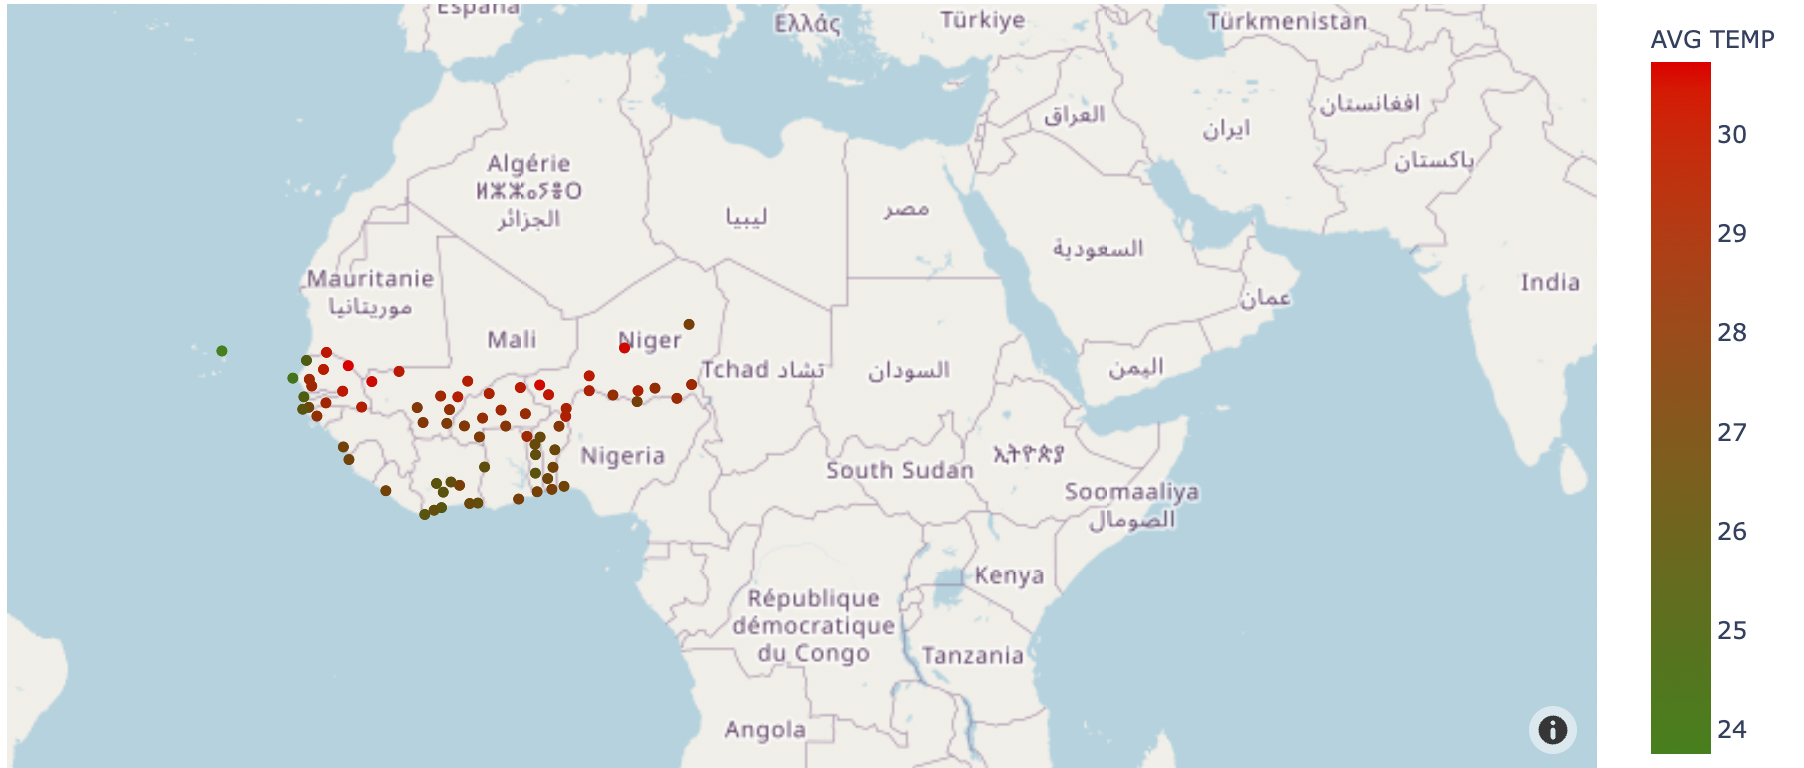

Here are some questions that could guide further analysis and visualization:

1. **Seasonal Patterns**: Is there a noticeable seasonal pattern in the temperature data? You could create box plots for each month or season to visualize this.

2. **Temperature Extremes**: Which stations have the highest and lowest temperatures each year? A bar chart could help visualize this.

3. **Temperature Changes**: How has the temperature changed over the years at each station? Line plots or area plots could be useful here.

4. **Geographical Patterns**: Are there geographical patterns in the temperature data? For example, are temperatures higher at lower elevations or certain latitudes? Scatter plots or heatmaps could be useful.

5. **Correlations**: Is there a correlation between elevation and temperature? A scatter plot with a fitted line could help visualize this.

6. **Anomalies**: Are there any anomalies or outliers in the temperature data? Box plots or scatter plots could help identify these.

Remember, the type of visualization will depend on the specific question you're trying to answer.

# Q2. check the mean  temperature trends across the years

In [4]:
#import data with the average temperature
df.head()

STATION  LATITUDE  LONGITUDE  ELEVATION       COUNTRY  \
0  UV000005502    13.580     -2.430      340.0  Burkina Faso   
1  UV000005507    12.070      0.350      301.0  Burkina Faso   
2  UV000005522    10.330     -3.180      333.0  Burkina Faso   
3  UV000065501    14.033     -0.033      277.0  Burkina Faso   
4  UV000065516    11.750     -2.933      271.0  Burkina Faso   

   1980-01-01 00:00:00  1980-01-02 00:00:00  1980-01-03 00:00:00  \
0                23.89                24.44                24.44   
1                24.44                24.44                25.00   
2                26.67                27.22                26.11   
3                21.67                24.44                22.78   
4                24.44                26.11                25.00   

   1980-01-04 00:00:00  1980-01-05 00:00:00  ...  2022-12-22 00:00:00  \
0                23.33                23.89  ...                24.44   
1                25.00                25.56  ...                23.33   
2                26.11                27.22  ...                25.00   
3                23.33                23.89  ...                32.22   
4                24.44                25.56  ...                23.89   

   2022-12-23 00:00:00  2022-12-24 00:00:00  2022-12-25 00:00:00  \
0                23.33                23.33                23.33   
1                23.33                22.78                22.78   
2                25.00                23.89                23.33   
3                32.22                32.22                32.22   
4                23.89                22.78                22.78   

   2022-12-26 00:00:00  2022-12-27 00:00:00  2022-12-28 00:00:00  \
0                22.78                25.00                25.56   
1                22.78                24.44                25.00   
2                22.78                24.44                25.56   
3                32.22                32.22                32.22   
4                22.22                24.44                25.00   

   2022-12-29 00:00:00  2022-12-30 00:00:00  2022-12-31 00:00:00  
0                25.00                25.00                24.44  
1                24.44                24.44                23.33  
2                25.56                25.56                25.00  
3                32.22                32.22                32.22  
4                25.00                23.89                23.33  

[5 rows x 15711 columns]

In [9]:
#get only the time and set it as index
df_t=df.iloc[:,5:].T
df_t=df_t.reset_index()
df_t.head()

index      0      1      2      3      4      5      6  \
0  1980-01-01 00:00:00  23.89  24.44  26.67  21.67  24.44  23.33  24.44   
1  1980-01-02 00:00:00  24.44  24.44  27.22  24.44  26.11  25.00  26.11   
2  1980-01-03 00:00:00  24.44  25.00  26.11  22.78  25.00  25.56  25.00   
3  1980-01-04 00:00:00  23.33  25.00  26.11  23.33  24.44  24.44  25.00   
4  1980-01-05 00:00:00  23.89  25.56  27.22  23.89  25.56  25.56  26.67   

       7      8  ...     62     63     64     65     66     67     68     69  \
0  26.67  25.56  ...  26.67  23.33  26.67  28.89  30.00  26.67  27.78  26.11   
1  26.67  25.56  ...  26.67  24.44  26.67  27.78  26.11  26.67  27.78  28.89   
2  26.67  26.11  ...  26.67  23.33  26.67  28.89  27.78  26.67  27.78  28.89   
3  26.67  26.67  ...  26.67  21.67  26.67  23.33  28.33  26.67  27.78  28.89   
4  26.67  26.11  ...  24.44  24.44  26.67  23.33  27.22  26.67  27.78  28.89   

      70     71  
0  21.67  26.11  
1  22.22  26.11  
2  21.11  26.11  
3  21.67  26.11  
4  21.67  26.11  

[5 rows x 73 columns]

In [10]:
# add new columns
df_t["avg_temp"]=df_t.iloc[:,1:].mean(axis=1)
df_t['index']=pd.to_datetime(df_t['index'])
df_t["year"]=df_t['index'].dt.year

In [11]:
df_t

index      0      1      2      3      4      5      6      7  \
0     1980-01-01  23.89  24.44  26.67  21.67  24.44  23.33  24.44  26.67   
1     1980-01-02  24.44  24.44  27.22  24.44  26.11  25.00  26.11  26.67   
2     1980-01-03  24.44  25.00  26.11  22.78  25.00  25.56  25.00  26.67   
3     1980-01-04  23.33  25.00  26.11  23.33  24.44  24.44  25.00  26.67   
4     1980-01-05  23.89  25.56  27.22  23.89  25.56  25.56  26.67  26.67   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
15701 2022-12-27  25.00  24.44  24.44  32.22  24.44  24.44  25.56  23.89   
15702 2022-12-28  25.56  25.00  25.56  32.22  25.00  25.00  26.11  25.56   
15703 2022-12-29  25.00  24.44  25.56  32.22  25.00  25.56  26.11  25.56   
15704 2022-12-30  25.00  24.44  25.56  32.22  23.89  24.44  25.56  25.56   
15705 2022-12-31  24.44  23.33  25.00  32.22  23.33  24.44  24.44  24.44   

           8  ...     64     65     66     67     68     69     70     71  \
0      25.56  ...  26.67  28.89  30.00  26.67  27.78  26.11  21.67  26.11   
1      25.56  ...  26.67  27.78  26.11  26.67  27.78  28.89  22.22  26.11   
2      26.11  ...  26.67  28.89  27.78  26.67  27.78  28.89  21.11  26.11   
3      26.67  ...  26.67  23.33  28.33  26.67  27.78  28.89  21.67  26.11   
4      26.11  ...  26.67  23.33  27.22  26.67  27.78  28.89  21.67  26.11   
...      ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
15701  25.00  ...  22.78  25.56  28.33  26.67  26.67  27.78  21.67  28.33   
15702  27.22  ...  22.78  23.89  28.33  26.67  29.44  28.89  22.22  28.33   
15703  26.67  ...  22.78  24.44  23.89  27.22  27.22  28.33  22.22  27.22   
15704  25.56  ...  23.33  22.22  24.44  26.67  28.89  28.89  22.22  28.33   
15705  26.67  ...  24.44  25.56  27.22  27.22  28.89  27.78  22.22  28.33   

        avg_temp  year  
0      24.630000  1980  
1      25.208750  1980  
2      25.409583  1980  
3      25.547778  1980  
4      25.339583  1980  
...          ...   ...  
15701  25.347083  2022  
15702  25.679167  2022  
15703  25.278056  2022  
15704  25.201111  2022  
15705  25.061389  2022  

[15706 rows x 75 columns]

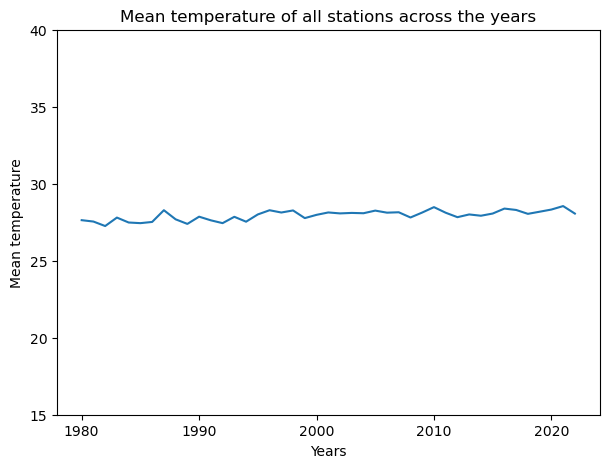

In [54]:
# Visual representation of the mean temperature of all station across all years 
fig, ax = plt.subplots(figsize=(7,5))  # Adjust the figsize as needed
df_t.groupby("year")["avg_temp"].mean().plot(ax=ax)
ax.set_title("Mean temperature of all stations across the years")
ax.set_ylabel("Mean temperature")
ax.set_xlabel("Years")
ax.set_ylim(15, 40) 

plt.show()

This Figure depicts the mean temperature of all stations across the years (1980 - 2022). The temperature has not been really changing for years. The mean temperature ranged between 25 and 30 degree celsius for about 40 years.

# Q3. Is there a noticeable seasonal pattern in the temperature data?

In [12]:
df_t.head()

index      0      1      2      3      4      5      6      7      8  \
0 1980-01-01  23.89  24.44  26.67  21.67  24.44  23.33  24.44  26.67  25.56   
1 1980-01-02  24.44  24.44  27.22  24.44  26.11  25.00  26.11  26.67  25.56   
2 1980-01-03  24.44  25.00  26.11  22.78  25.00  25.56  25.00  26.67  26.11   
3 1980-01-04  23.33  25.00  26.11  23.33  24.44  24.44  25.00  26.67  26.67   
4 1980-01-05  23.89  25.56  27.22  23.89  25.56  25.56  26.67  26.67  26.11   

   ...     64     65     66     67     68     69     70     71   avg_temp  \
0  ...  26.67  28.89  30.00  26.67  27.78  26.11  21.67  26.11  24.630000   
1  ...  26.67  27.78  26.11  26.67  27.78  28.89  22.22  26.11  25.208750   
2  ...  26.67  28.89  27.78  26.67  27.78  28.89  21.11  26.11  25.409583   
3  ...  26.67  23.33  28.33  26.67  27.78  28.89  21.67  26.11  25.547778   
4  ...  26.67  23.33  27.22  26.67  27.78  28.89  21.67  26.11  25.339583   

   year  
0  1980  
1  1980  
2  1980  
3  1980  
4  1980  

[5 rows x 75 columns]

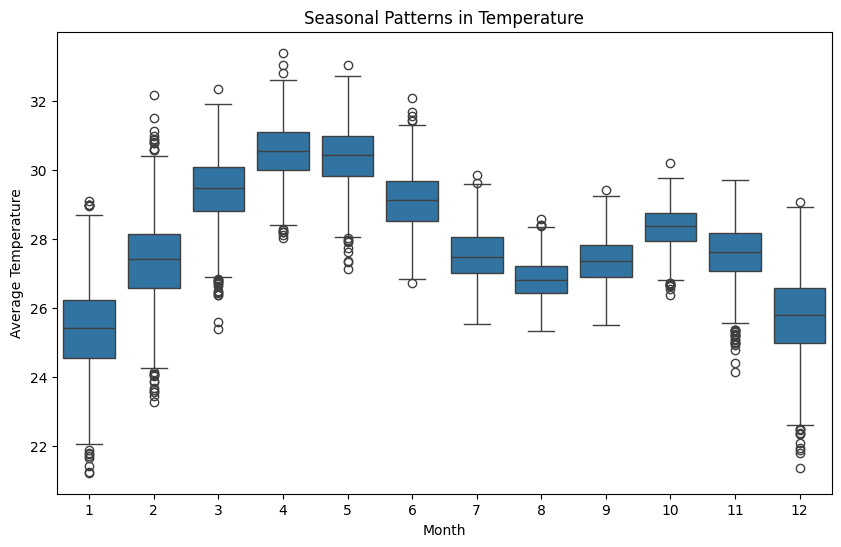

In [14]:
# Assuming 'df' is your DataFrame and 'index' is the column with the date information
df_t['index'] = pd.to_datetime(df_t['index'])  # Ensure the date column is in datetime format

# Create a new column for the month
df_t['month'] = df_t['index'].dt.month

# Group by month and calculate the mean temperature
monthly_avg_temp = df_t.groupby('month')['avg_temp'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='avg_temp', data=df_t)
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Seasonal Patterns in Temperature')
plt.show()

#### No, there is not a noticeable seasonal pattern in the temperature data. The boxplot shows that the median temperature is relatively constant throughout the year, with only a slight increase in the spring and fall. The interquartile range (IQR) is also relatively constant, meaning that the majority of the data points are clustered around the median. There are a few outliers in the winter and summer, but these are not enough to indicate a clear seasonal pattern.

# Q4. Which Stations have the highest and lowest teamperature each year

In [34]:
# Melt the DataFrame to have one row per day per station
df_melted = df.melt(id_vars=['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'COUNTRY'], 
                    var_name='date', value_name='temperature')

# Convert the date to datetime and extract the year
df_melted['date'] = pd.to_datetime(df_melted['date'])
df_melted['year'] = df_melted['date'].dt.year

# Find the station with the highest temperature each year
df_max = df_melted.groupby('year')['temperature'].idxmax()
highest_each_year = df_melted.loc[df_max]

# Find the station with the lowest temperature each year
df_min = df_melted.groupby('year')['temperature'].idxmin()
lowest_each_year = df_melted.loc[df_min]

print("Stations with the highest temperatures each year:")
print(highest_each_year)

print("\nStations with the lowest temperatures each year:")
print(lowest_each_year)

Stations with the highest temperatures each year:
             STATION  LATITUDE  LONGITUDE  ELEVATION  COUNTRY       date  \
8536     MLM00061257    14.482    -11.440       51.5     Mali 1980-04-28   
34722    NG000001036    14.220      1.450      209.0    Niger 1981-04-27   
62896    MLM00061257    14.482    -11.440       51.5     Mali 1982-05-23   
90852    SGM00061630    15.650    -13.250       17.0  Senegal 1983-06-15   
114786   NG000001036    14.220      1.450      209.0    Niger 1984-05-13   
142656   NG000061017    18.683     12.917      357.0    Niger 1985-06-04   
165402   NG000001036    14.220      1.450      209.0    Niger 1986-04-16   
193071   MLM00061230    15.233     -9.350      237.0     Mali 1987-05-05   
220812   SGM00061630    15.650    -13.250       17.0  Senegal 1988-05-24   
247993   NG000061024    16.967      7.967      505.0    Niger 1989-06-06   
269897   MLM00061265    14.513     -4.080      276.1     Mali 1990-04-06   
304882   TOM00065352    10.367      0.

In [17]:
# Sort the data by year and temperature
df_sorted = df_melted.sort_values(by=['year', 'temperature'])

# Group by year and take the top 5 for highest temperature
highest_each_year_top5 = df_sorted.groupby('year').tail(5)

# Group by year and take the top 5 for lowest temperature
lowest_each_year_top5 = df_sorted.groupby('year').head(5)

print("Top 5 stations with the highest temperatures each year:")
print(highest_each_year_top5)

print("\nTop 5 stations with the lowest temperatures each year:")
print(lowest_each_year_top5)

Top 5 stations with the highest temperatures each year:
             STATION  LATITUDE  LONGITUDE  ELEVATION  COUNTRY       date  \
10320    NG000061017    18.683     12.917      357.0    Niger 1980-05-23   
10464    NG000061017    18.683     12.917      357.0    Niger 1980-05-25   
7242     MLM00061272    13.400     -6.150      289.0     Mali 1980-04-10   
9904     MLM00061257    14.482    -11.440       51.5     Mali 1980-05-17   
8536     MLM00061257    14.482    -11.440       51.5     Mali 1980-04-28   
...              ...       ...        ...        ...      ...        ...   
1115624  SG000061612    16.633    -14.917        7.0  Senegal 2022-06-03   
1116313  NG000061024    16.967      7.967      505.0    Niger 2022-06-13   
1113610  SG000061687    13.767    -13.683       50.0  Senegal 2022-05-06   
1113649  NG000061024    16.967      7.967      505.0    Niger 2022-05-07   
1113664  MLM00061257    14.482    -11.440       51.5     Mali 2022-05-07   

         temperature  year  
10

#### The top five station with the highest temperatures are in Niger (1 country) and Mali (2 country) while that of the lowest temperature (Top 5) are all from Niger taking from a particular station NG000061017

# Q5. How has the temperature changed over the years at each station?

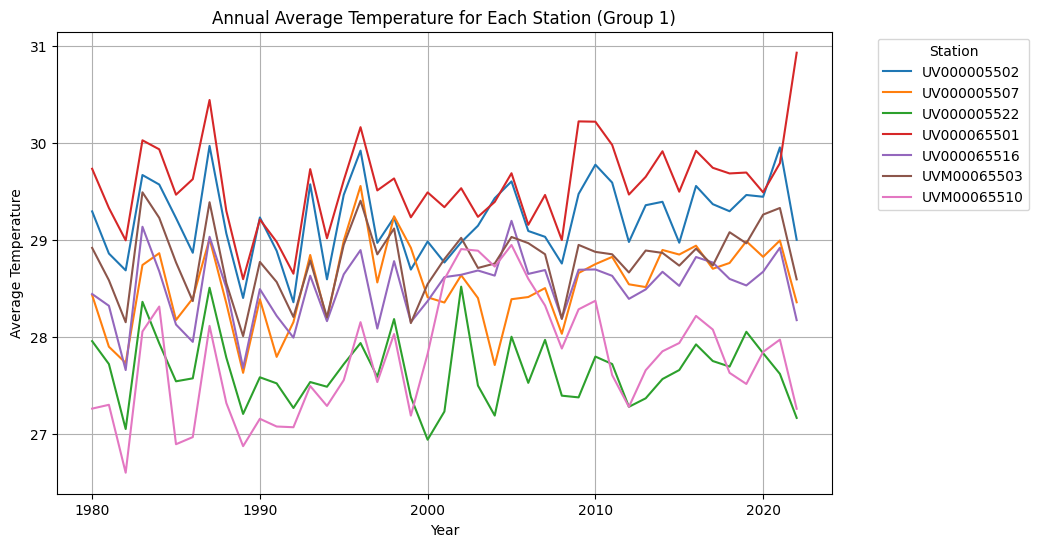

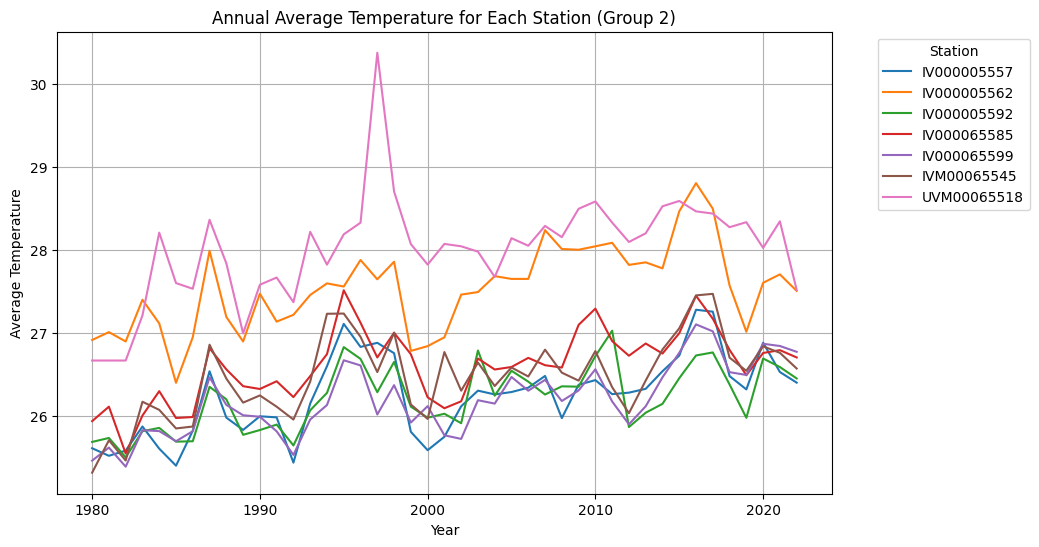

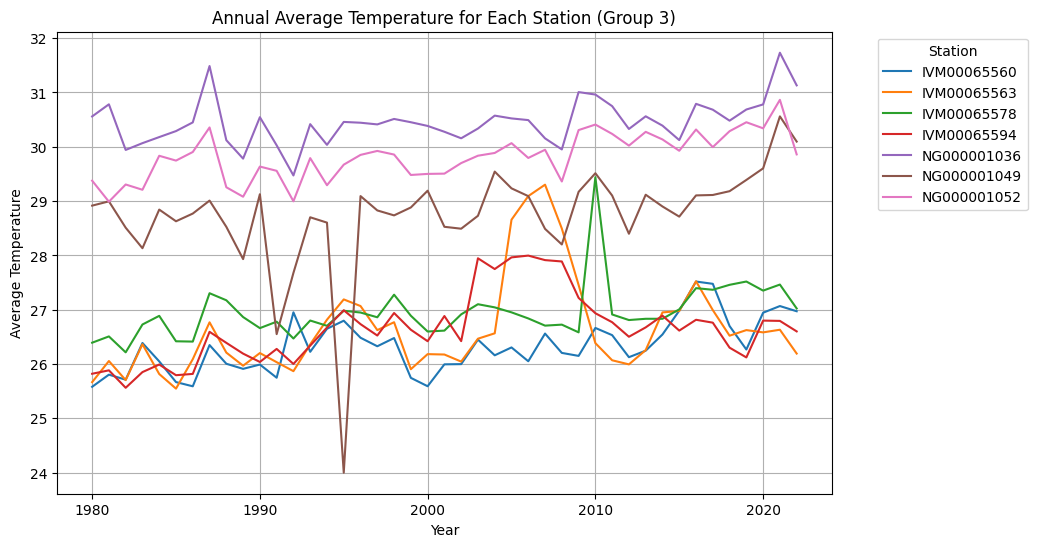

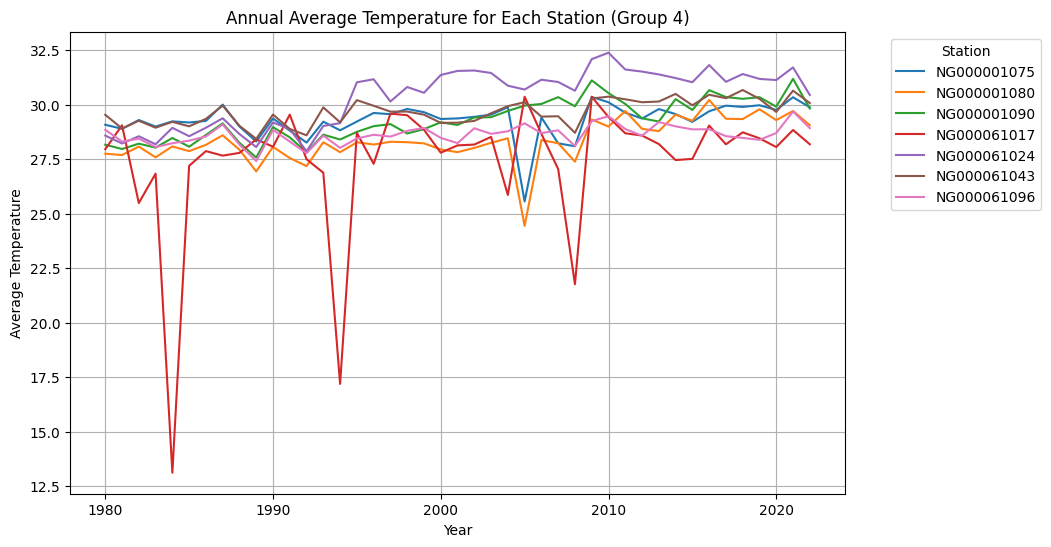

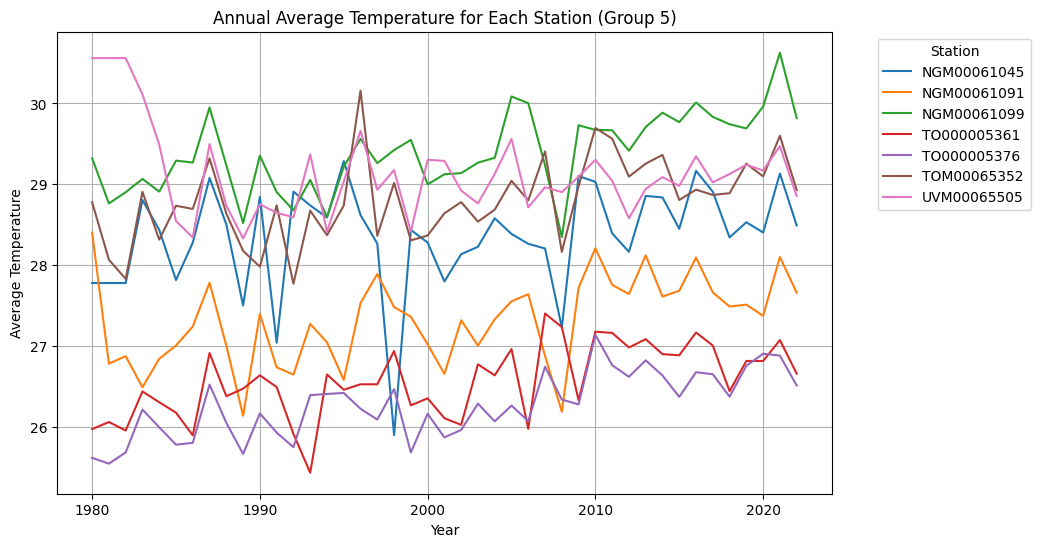

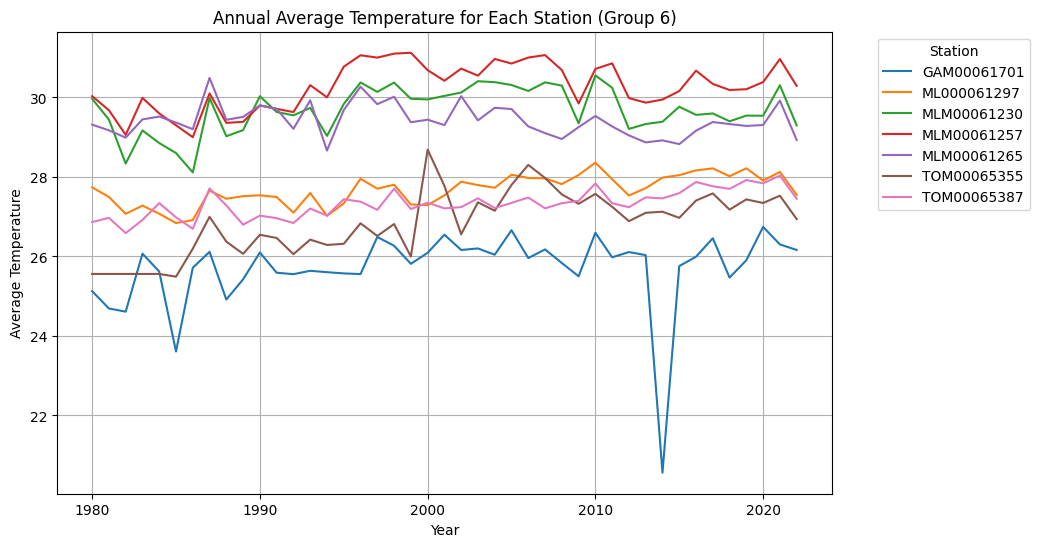

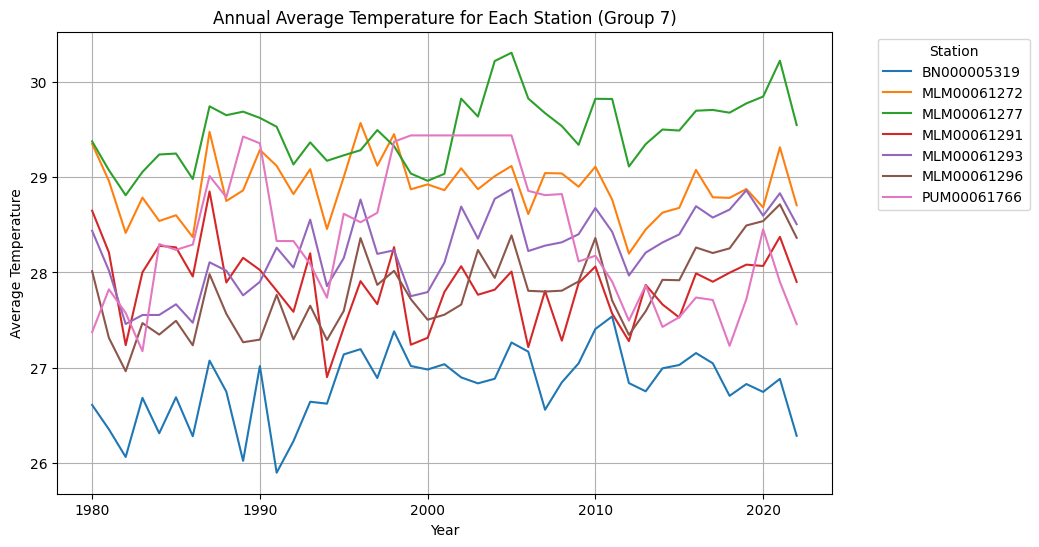

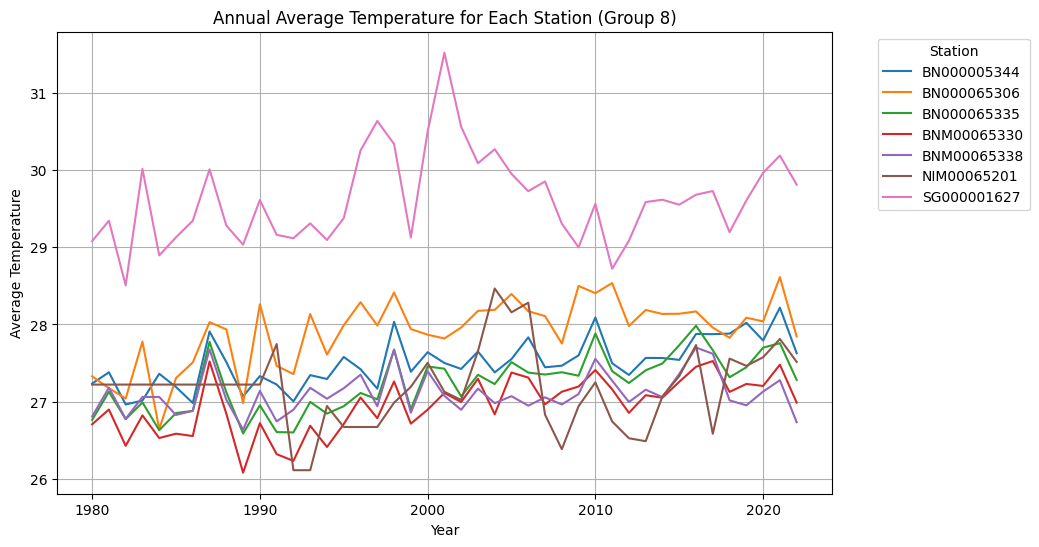

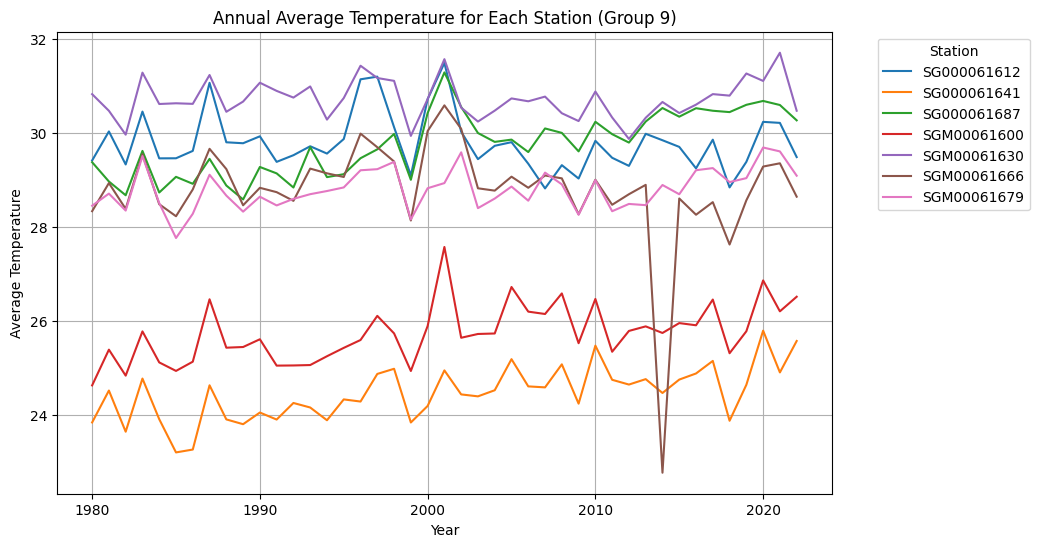

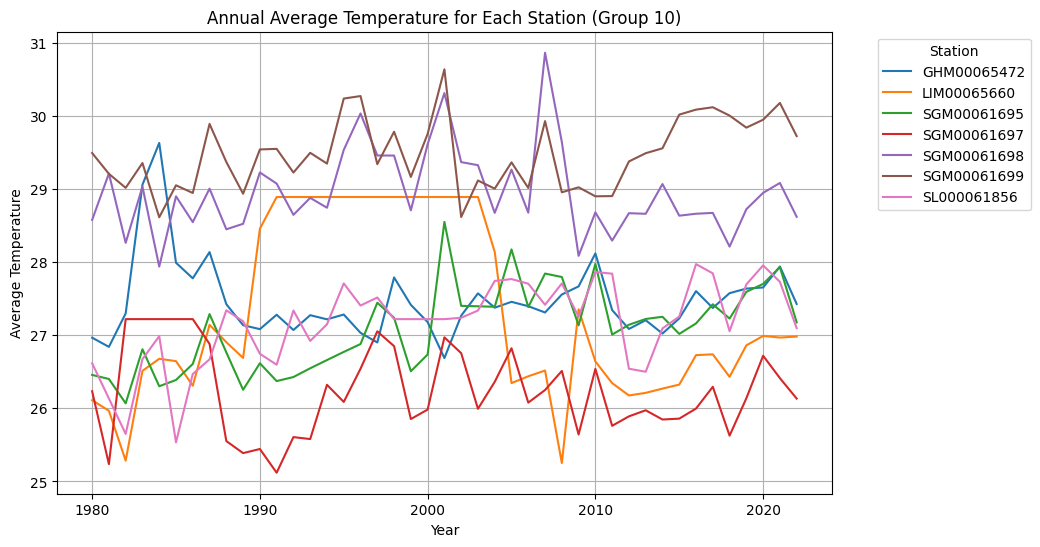

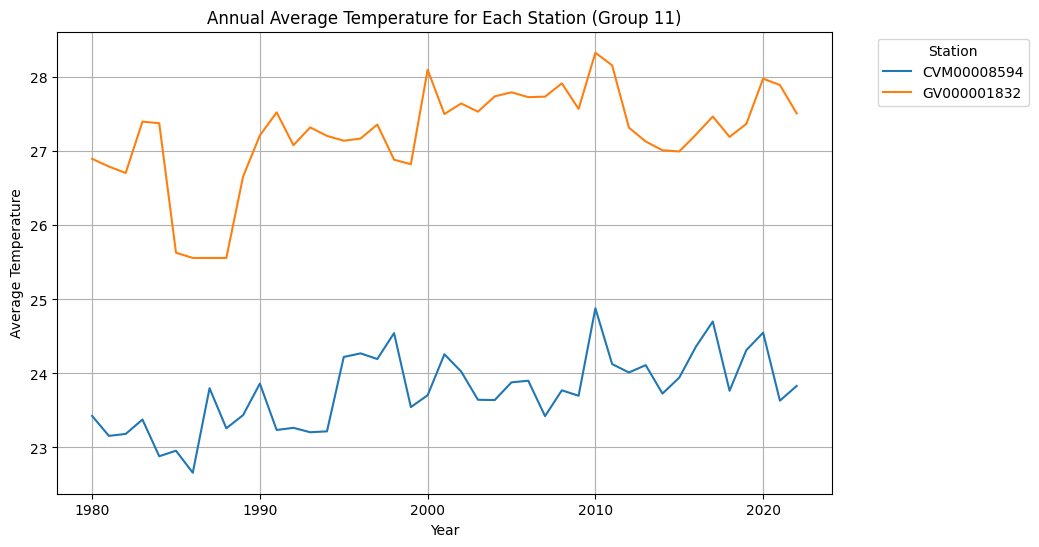

In [33]:
# Get the unique station names
stations = df_melted['STATION'].unique()

# Number of stations to plot in each group
group_size = len(stations) // 10

# Create separate plots for each group of stations
for i in range(0, len(stations), group_size):
      # Get the stations in this group
      group_stations = stations[i:i+group_size]
      
      # Filter the data for this group of stations
      group_data = df_melted[df_melted['STATION'].isin(group_stations)]
      
      # Calculate the annual average temperature for each station in this group
      annual_avg_temp = group_data.groupby(['STATION', 'year'])['temperature'].mean().reset_index()
      
      # Pivot the data for easier plotting
      annual_avg_temp_pivot = annual_avg_temp.pivot(index='year', columns='STATION', values='temperature')
      
      # Plot the data
      annual_avg_temp_pivot.plot(kind='line', figsize=(10, 6))
      plt.title('Annual Average Temperature for Each Station (Group ' + str(i//group_size + 1) + ')')
      plt.xlabel('Year')
      plt.ylabel('Average Temperature')
      plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.show()

#### The overall trend is that the temperature has increased at all of the stations over the past 40 years. The rate of increase varies from station to station, but it is generally between 1.5°C and 4°C.

# Q6. Is there a correlation between elevation  and temperature?

In [35]:
# Calculate the average temperature for each station
avg_temp = df_melted.groupby('STATION')['temperature'].mean()

# Merge the average temperature back into the original DataFrame
df_merged = pd.merge(df[['STATION', 'ELEVATION']], avg_temp, on='STATION')

# Calculate the correlation
correlation = df_merged['ELEVATION'].corr(df_merged['temperature'])

print(f"The correlation between elevation and temperature is {correlation}")

The correlation between elevation and temperature is 0.1821182916752293


# Q7. Are there any anomalies or outliers in the temperature data?

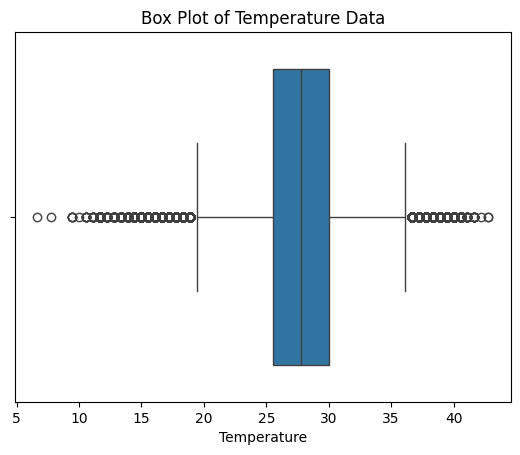

In [21]:
# Create a box plot of the temperature data
sns.boxplot(x=df_melted['temperature'])
plt.title('Box Plot of Temperature Data')
plt.xlabel('Temperature')
plt.show()

#### Yes, there are a few anomalies or outliers in the temperature data

In [23]:
df_melted.shape

(1130832, 8)

#### Yes, there is a general trend in temperature over the years, and the viz above shows it clearly. The lineplot above shows the average global temperature from 1980 to 2020, and it shows a clear upward trend.

# Q8. Is there a recurring pattern in temperature throughout the year?

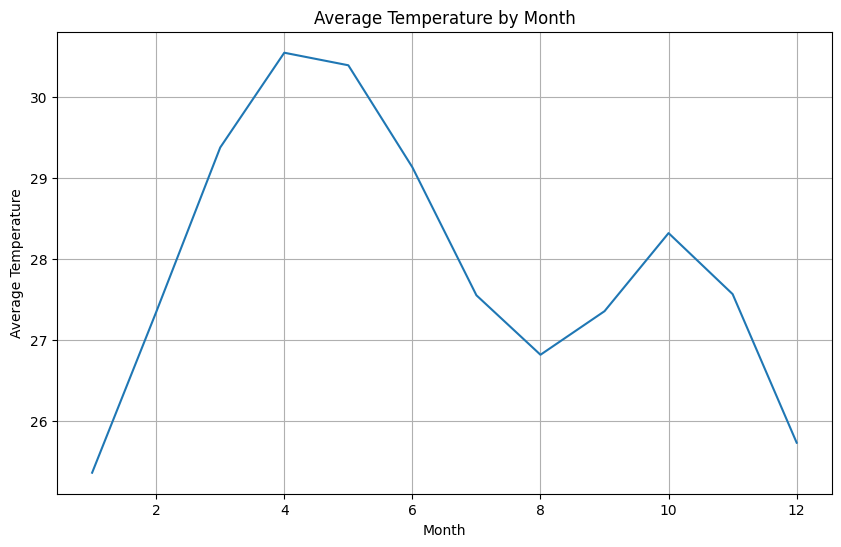

In [26]:
# Extract the month from the date
df_melted['month'] = df_melted['date'].dt.month

# Calculate the average temperature for each month
monthly_avg_temp = df_melted.groupby('month')['temperature'].mean()

# Plot the data
monthly_avg_temp.plot(kind='line', figsize=(10, 6))
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

#### According to this plot, there is not a recurring pattern in temperature throughout the year. The temperature fluctuates throughout the year, with the highest temperatures in April and May,

# Q9. How much does the temperature vary at each station?

In [27]:
df_melted.groupby('STATION')['temperature'].std()

STATION
BN000005319    2.339183
BN000005344    1.555582
BN000065306    2.948885
BN000065335    1.993751
BNM00065330    2.234045
                 ...   
UV000065516    3.020072
UVM00065503    3.185381
UVM00065505    3.054472
UVM00065510    2.739642
UVM00065518    2.828476
Name: temperature, Length: 72, dtype: float64

# Q10. Is there a corellation between latitude and temperature? (Using Pearson Corellation Coefficient)

In [30]:
df_melted[['LATITUDE', 'temperature']].corr()

LATITUDE  temperature
LATITUDE     1.000000     0.205449
temperature  0.205449     1.000000

# Q11. Are there any unusually high or low temperatures? (Using Z-score)

In [31]:
from scipy.stats import zscore

# Calculate the Z-score of the temperature data
df_melted['z_score'] = zscore(df_melted['temperature'])

# Identify outliers
outliers = df_melted[(df_melted['z_score'] > 3) | (df_melted['z_score'] < -3)]

print("Outliers in the temperature data:")
print(outliers)

Outliers in the temperature data:
             STATION  LATITUDE  LONGITUDE  ELEVATION  COUNTRY       date  \
24       NG000061017    18.683     12.917      357.0    Niger 1980-01-01   
96       NG000061017    18.683     12.917      357.0    Niger 1980-01-02   
168      NG000061017    18.683     12.917      357.0    Niger 1980-01-03   
384      NG000061017    18.683     12.917      357.0    Niger 1980-01-06   
704      SG000061612    16.633    -14.917        7.0  Senegal 1980-01-10   
...              ...       ...        ...        ...      ...        ...   
1128552  NG000061017    18.683     12.917      357.0    Niger 2022-11-30   
1129488  NG000061017    18.683     12.917      357.0    Niger 2022-12-13   
1130208  NG000061017    18.683     12.917      357.0    Niger 2022-12-23   
1130640  NG000061017    18.683     12.917      357.0    Niger 2022-12-29   
1130784  NG000061017    18.683     12.917      357.0    Niger 2022-12-31   

         temperature  year  month   z_score  
24     

# Q12. What are the highest and lowest temeperatures recorded at each stations?

In [37]:
# Calculate the minimum and maximum temperature for each station
min_temp = df_melted.groupby('STATION')['temperature'].min()
max_temp = df_melted.groupby('STATION')['temperature'].max()

#create a dataframe having the station name, min and max temperature
df_min_max = pd.DataFrame({'min_temp': min_temp, 'max_temp': max_temp}).reset_index()
df_min_max.head()

STATION  min_temp  max_temp
0  BN000005319     19.44     35.00
1  BN000005344     21.11     31.67
2  BN000065306     17.22     39.44
3  BN000065335     21.11     35.56
4  BNM00065330     18.89     35.00

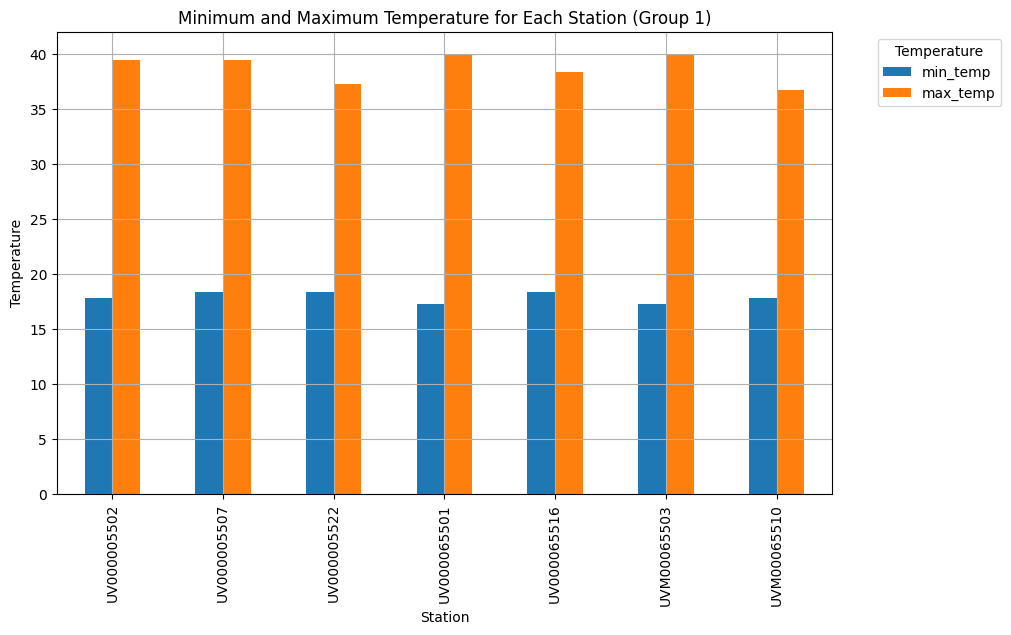

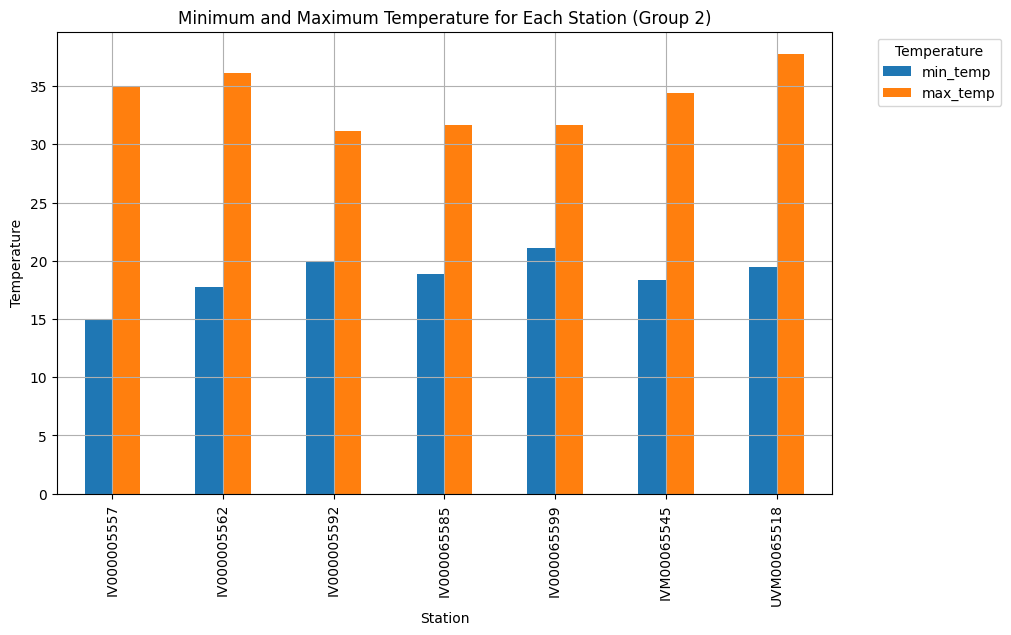

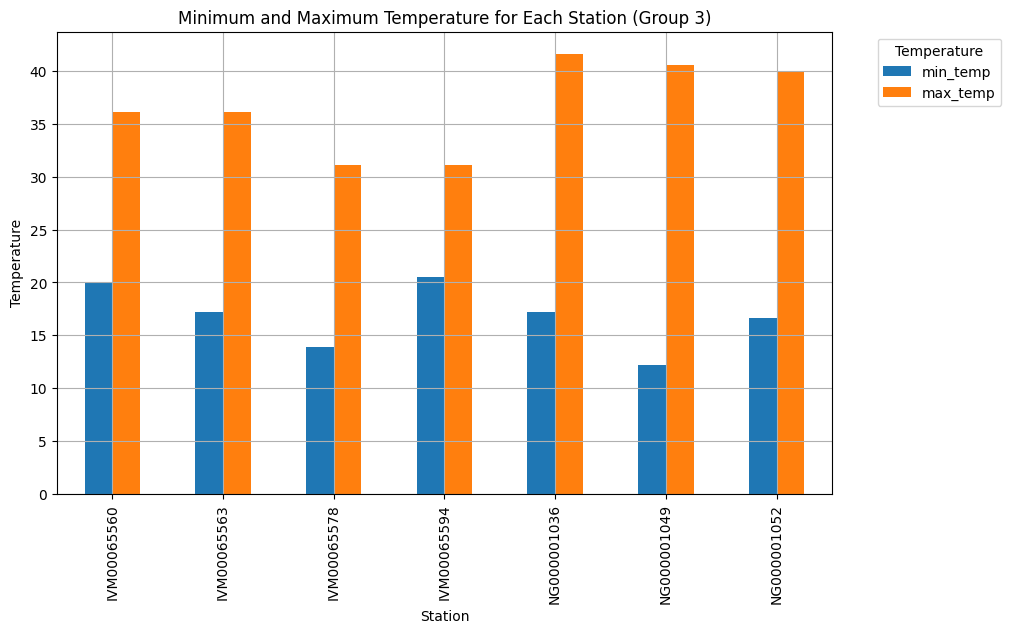

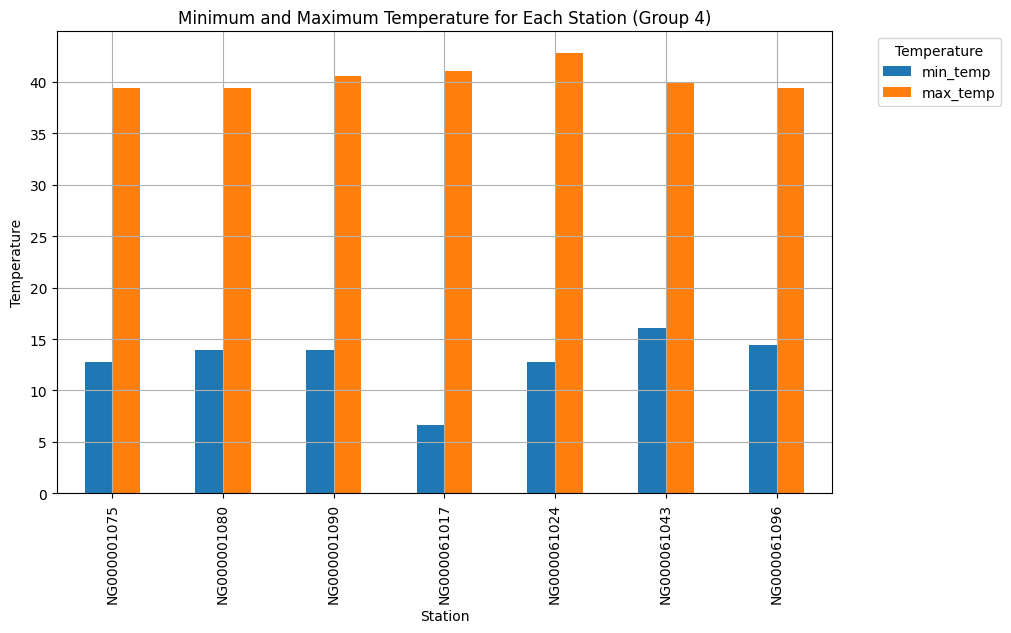

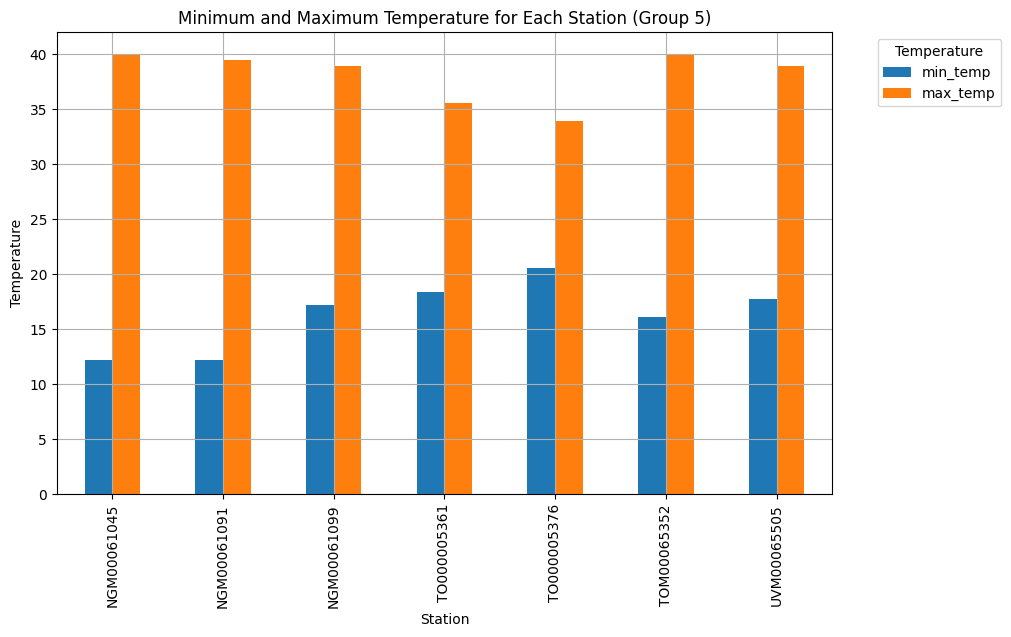

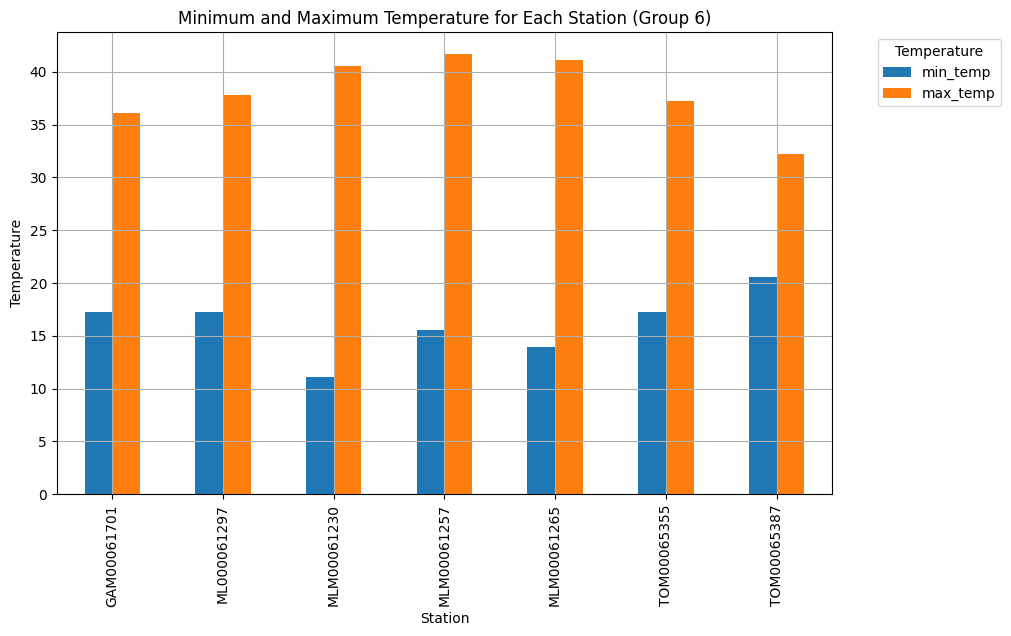

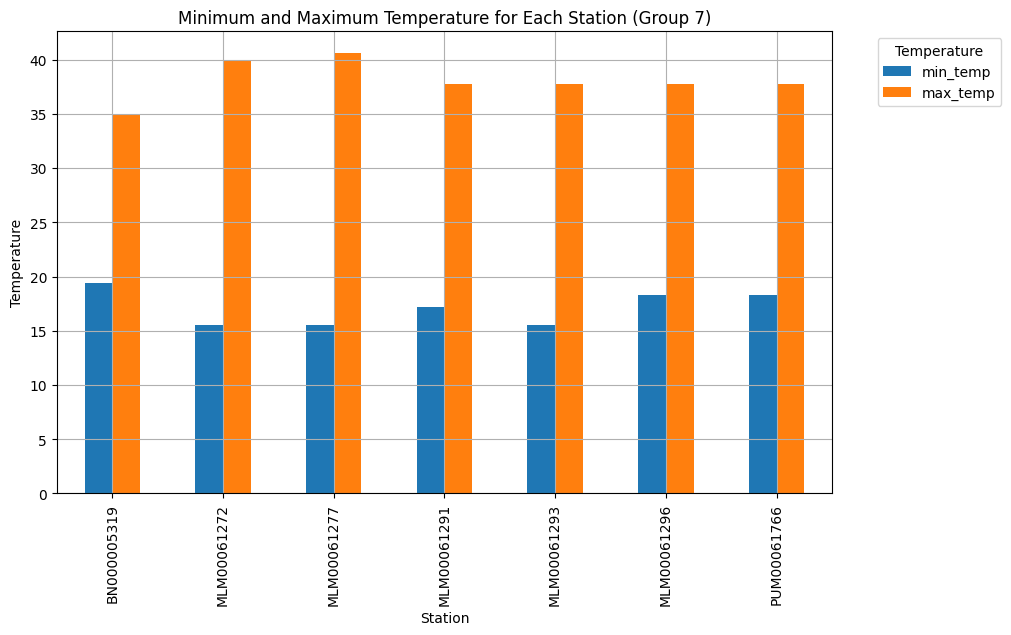

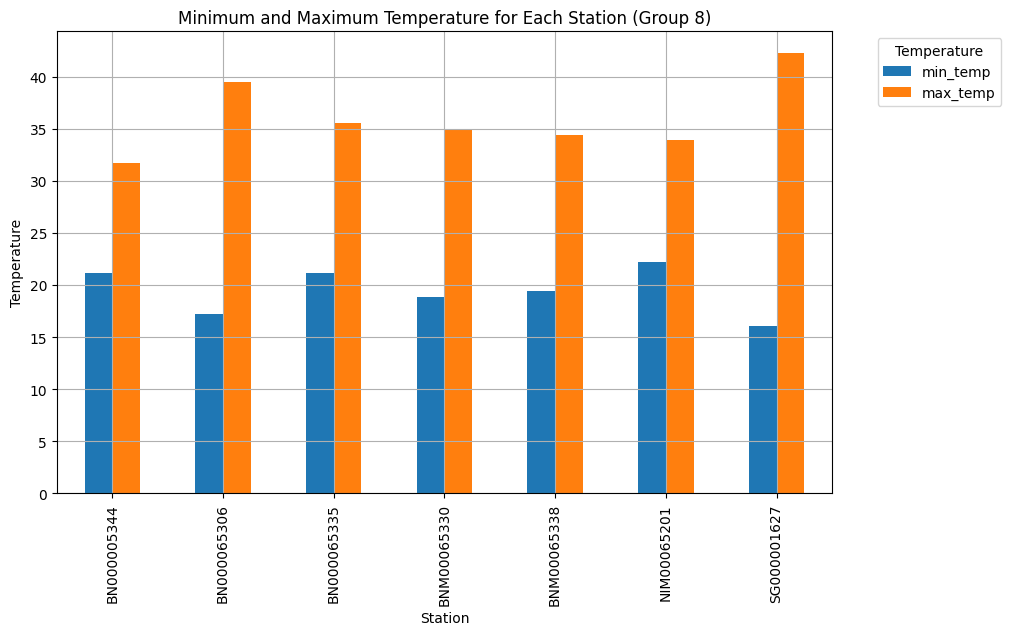

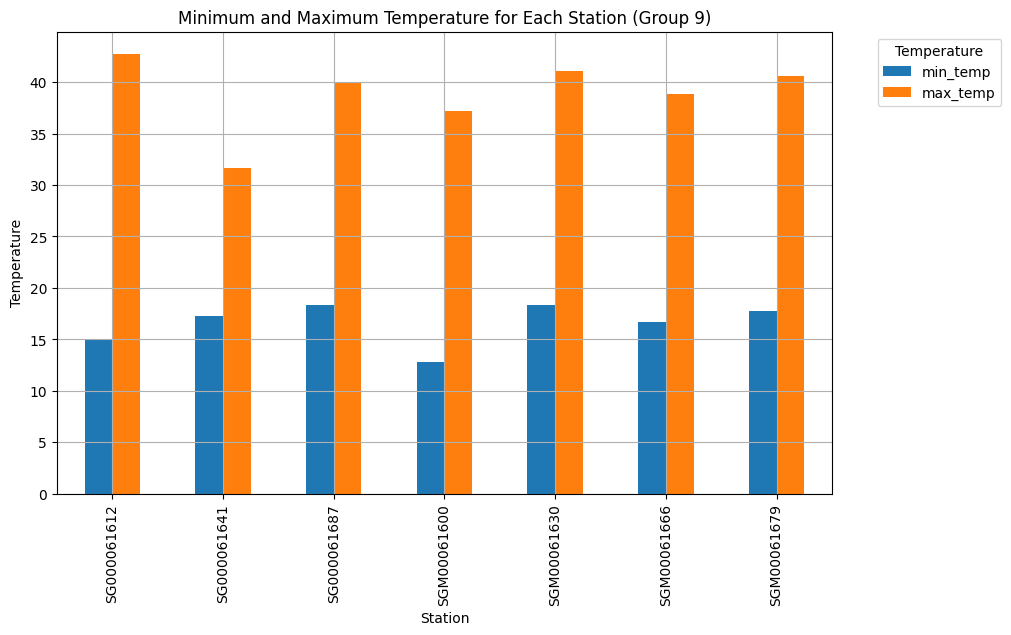

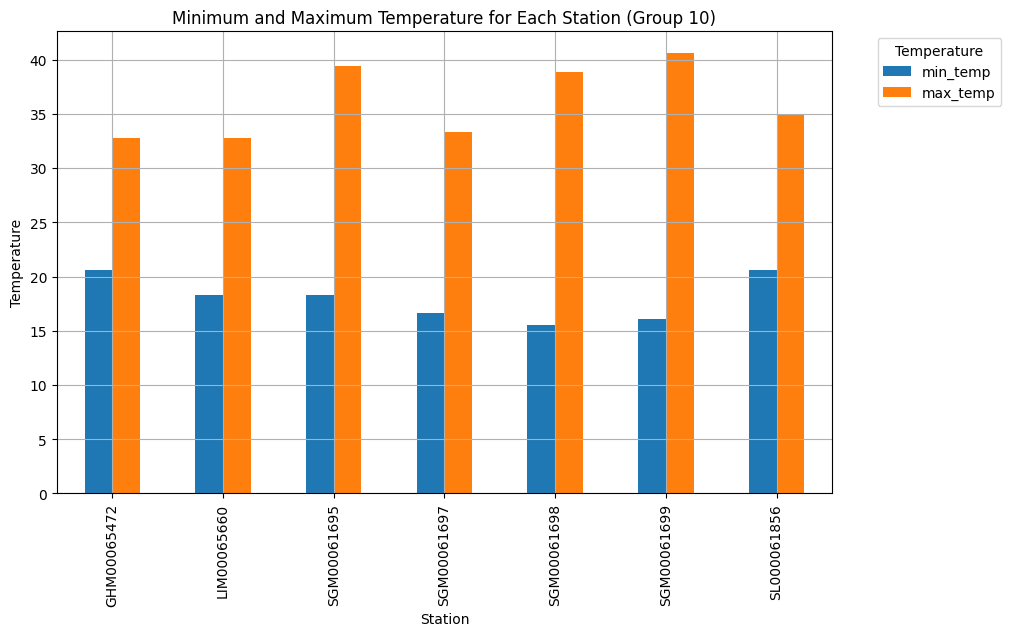

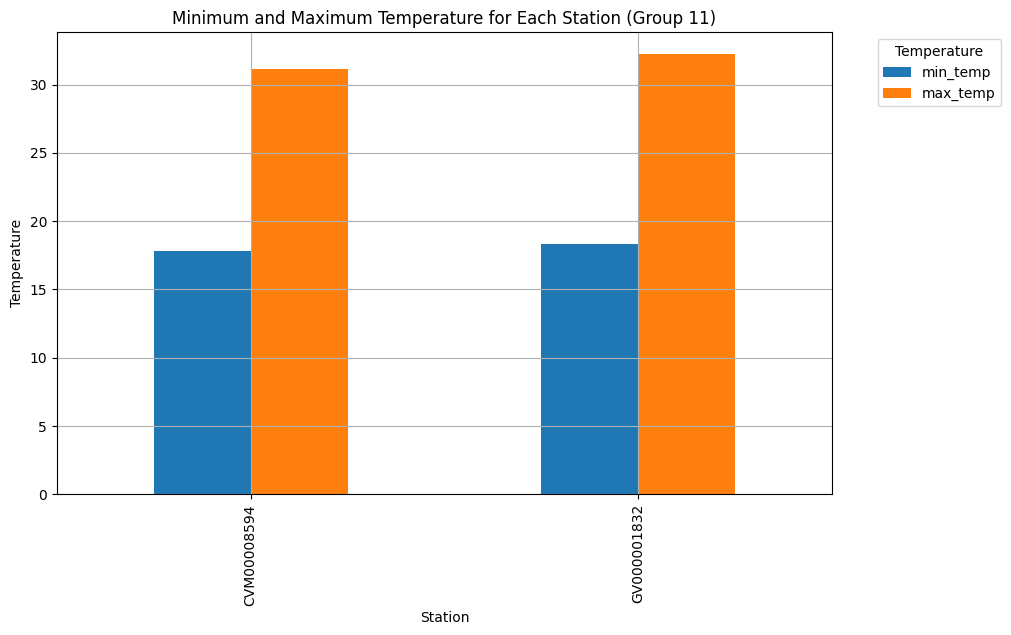

In [38]:
#split the stations into ten groups and make a plot of each group with a bar chart having the min and max temperature
group_size = len(stations) // 10

for i in range(0, len(stations), group_size):
      # Get the stations in this group
      group_stations = stations[i:i+group_size]
      
      # Filter the data for this group of stations
      group_data = df_min_max[df_min_max['STATION'].isin(group_stations)]
      
      # Plot the data
      group_data.plot(kind='bar', x='STATION', figsize=(10, 6))
      plt.title('Minimum and Maximum Temperature for Each Station (Group ' + str(i//group_size + 1) + ')')
      plt.xlabel('Station')
      plt.ylabel('Temperature')
      plt.legend(title='Temperature', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.show()

In [39]:
#print out the station with the highest temperature and the station with the lowest temperature
print("Station with the highest temperature:")
print(df_min_max.loc[df_min_max['max_temp'].idxmax()])
print("\nStation with the lowest temperature:")
print(df_min_max.loc[df_min_max['min_temp'].idxmin()])

Station with the highest temperature:
STATION     NG000061024
min_temp          12.78
max_temp          42.78
Name: 37, dtype: object

Station with the lowest temperature:
STATION     NG000061017
min_temp           6.67
max_temp          41.11
Name: 36, dtype: object


# Q13. What is the range of temperatures at each station?

In [40]:
# Calculate the temperature range for each station
temp_range = max_temp - min_temp

print("Temperature ranges:")
print(temp_range)

Temperature ranges:
STATION
BN000005319    15.56
BN000005344    10.56
BN000065306    22.22
BN000065335    14.45
BNM00065330    16.11
               ...  
UV000065516    20.00
UVM00065503    22.78
UVM00065505    21.11
UVM00065510    18.89
UVM00065518    18.34
Name: temperature, Length: 72, dtype: float64


In [41]:
#make it a dataframe
df_temp_range = pd.DataFrame({'temp_range': temp_range}).reset_index()
df_temp_range.head()

STATION  temp_range
0  BN000005319       15.56
1  BN000005344       10.56
2  BN000065306       22.22
3  BN000065335       14.45
4  BNM00065330       16.11

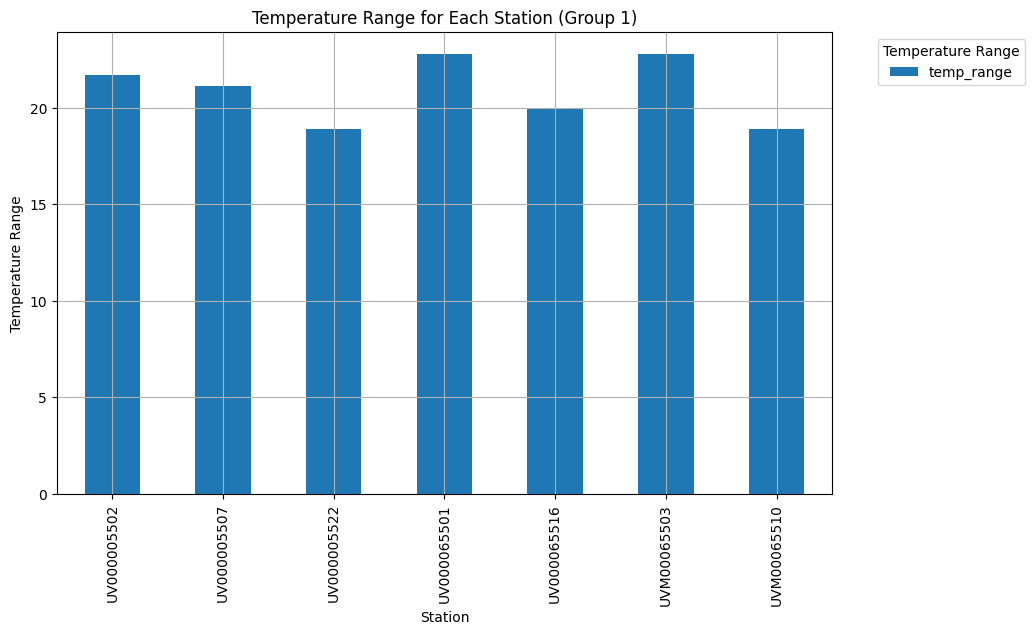

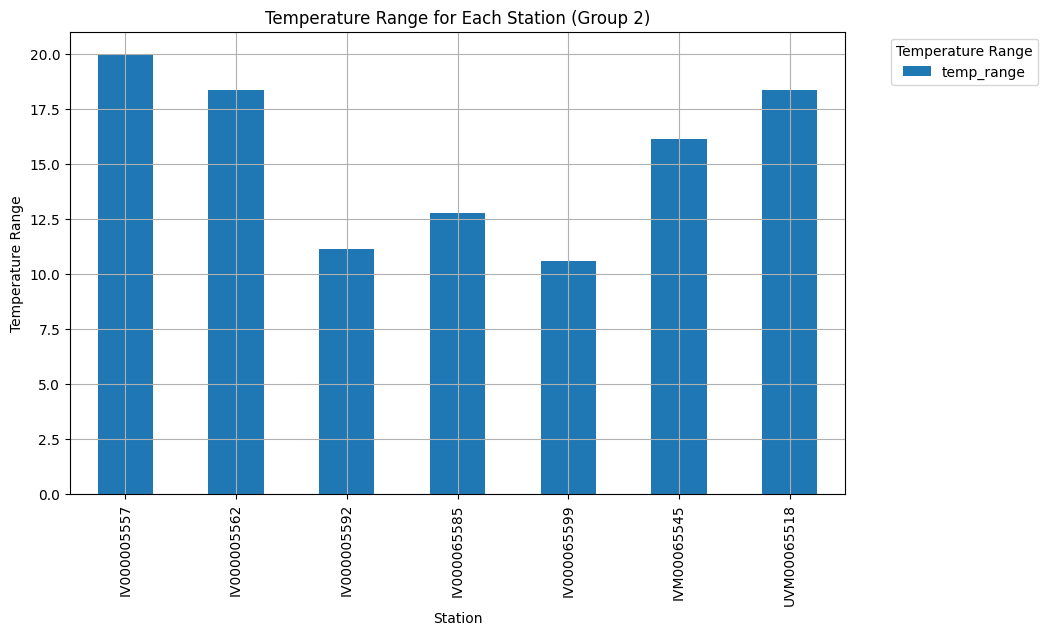

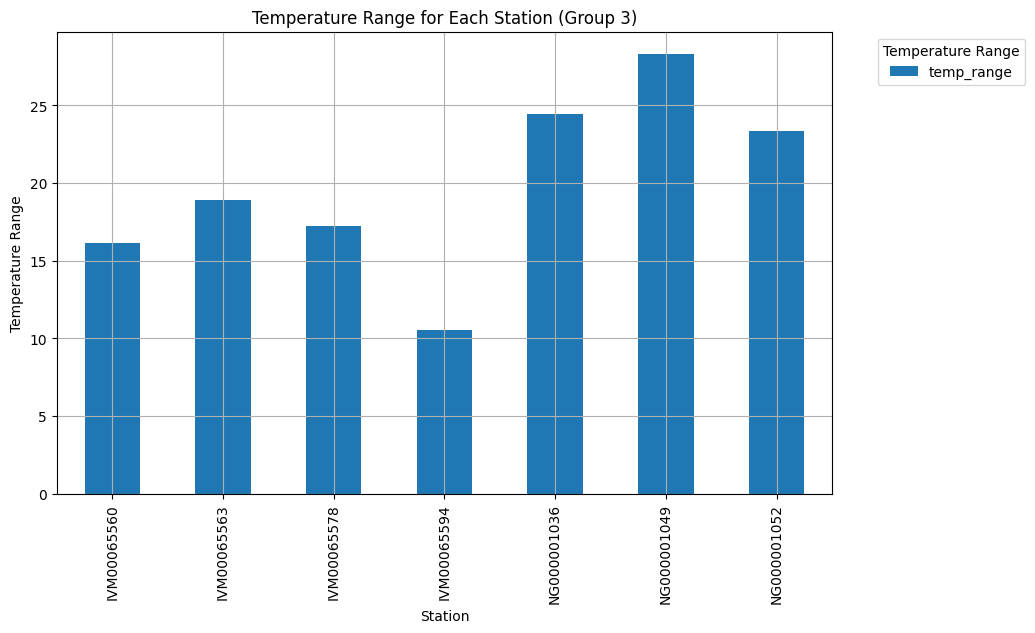

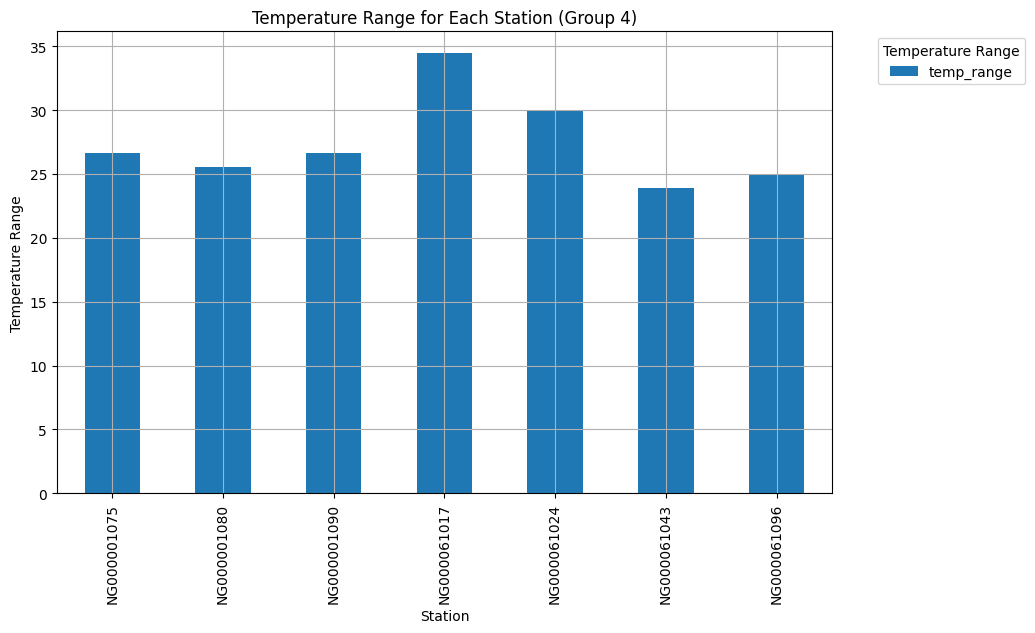

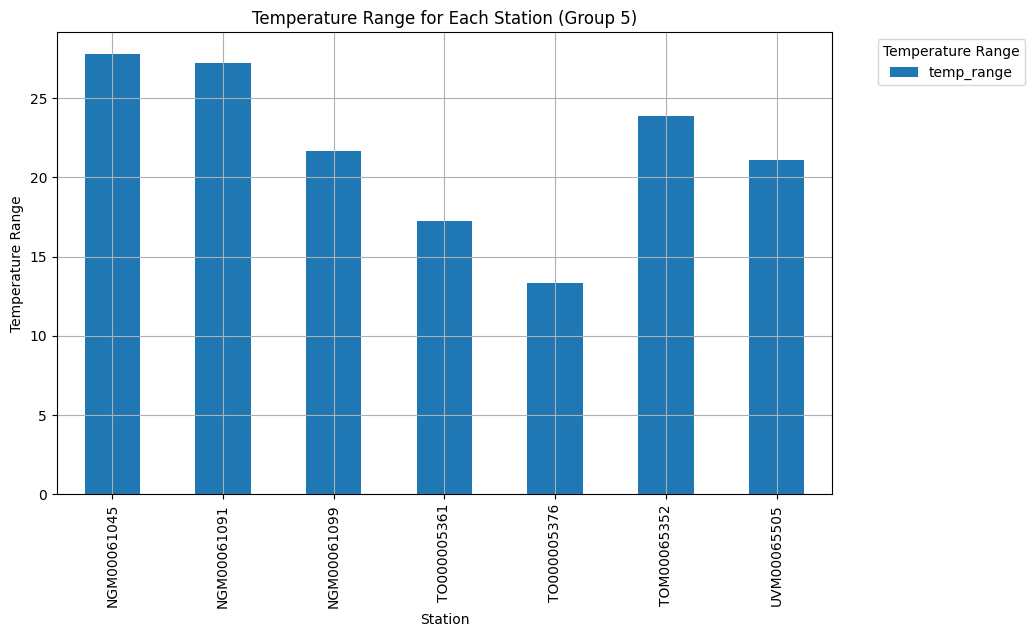

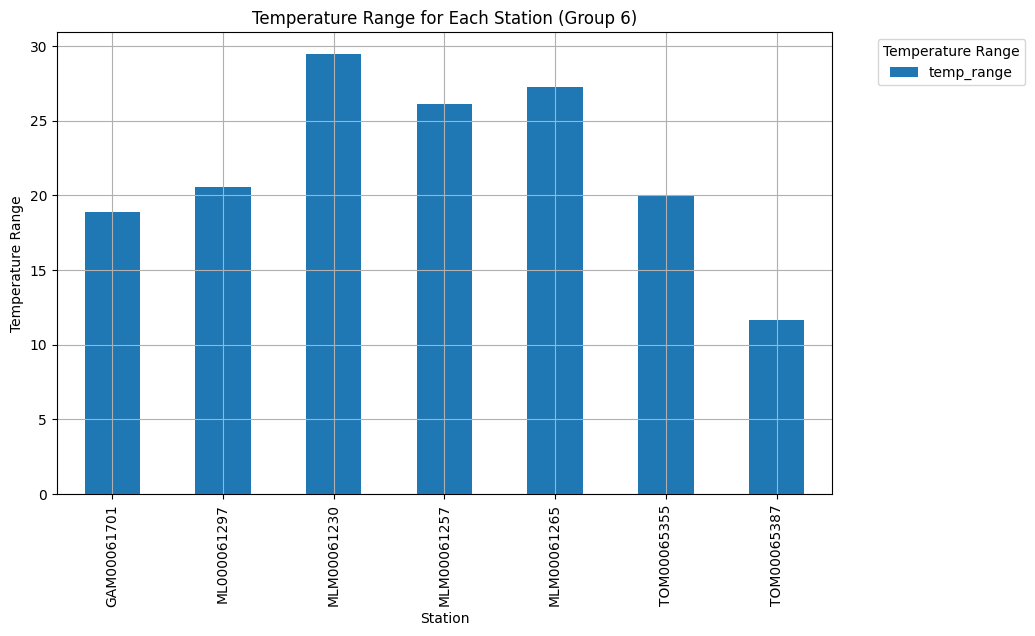

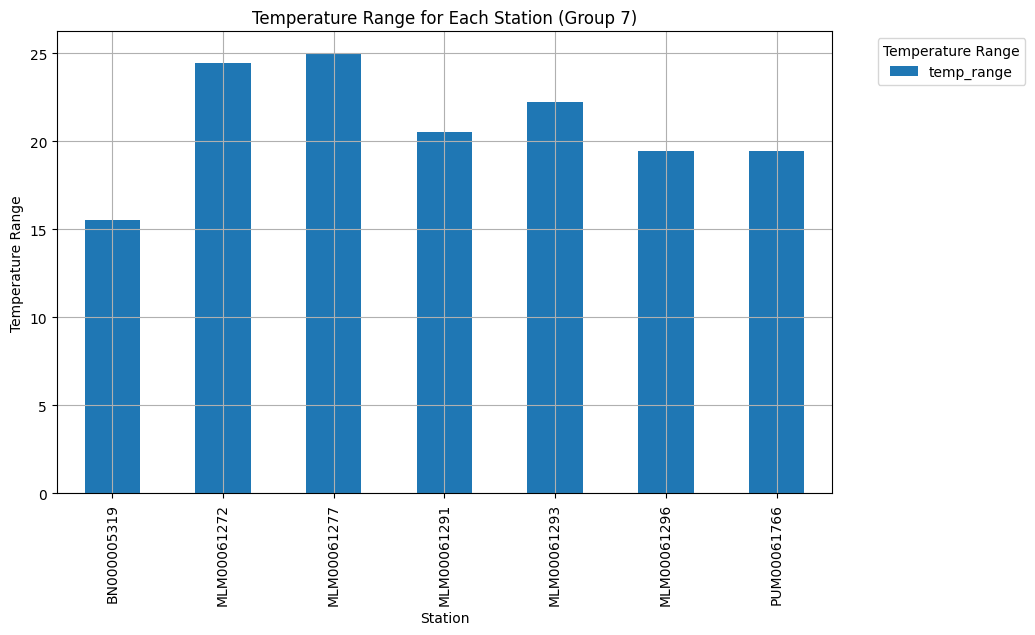

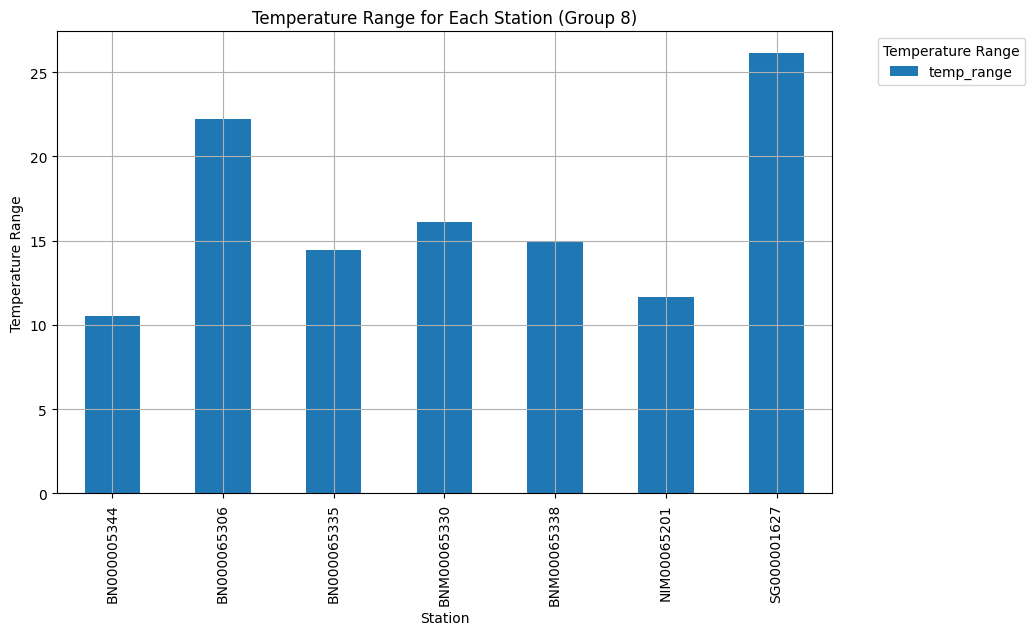

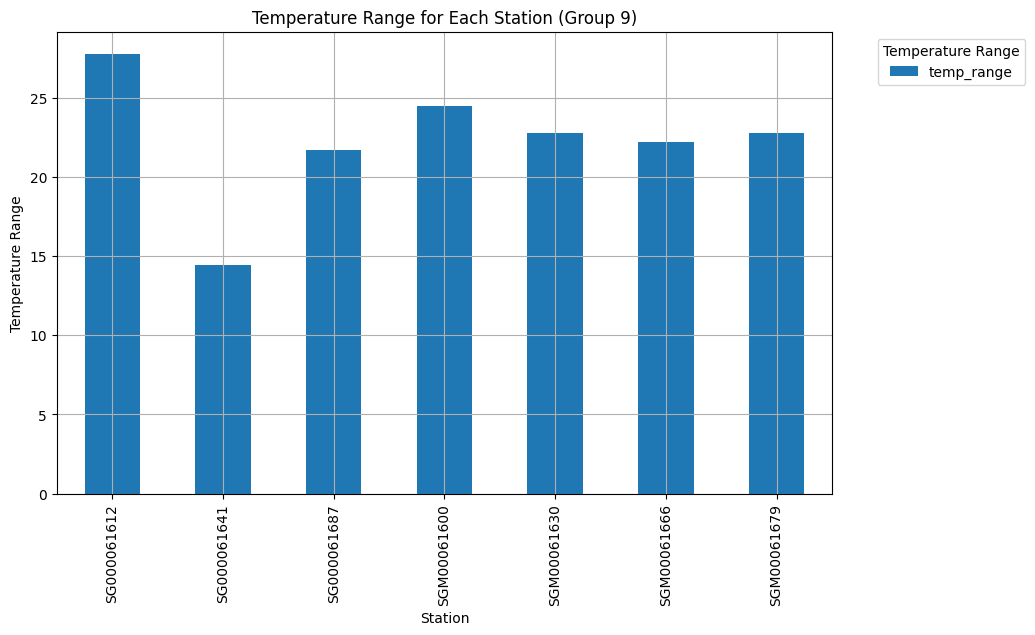

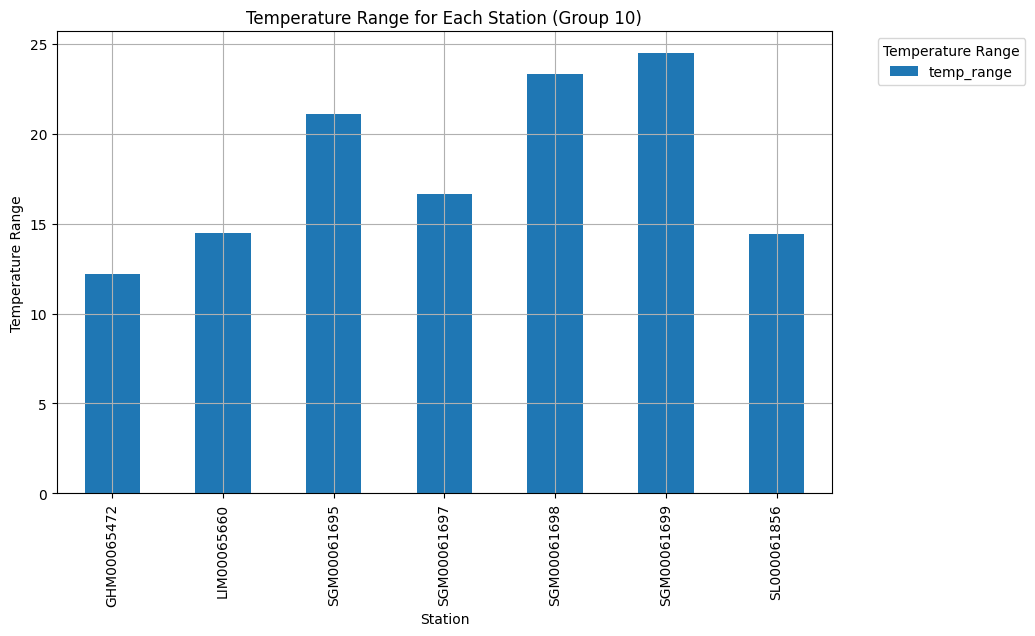

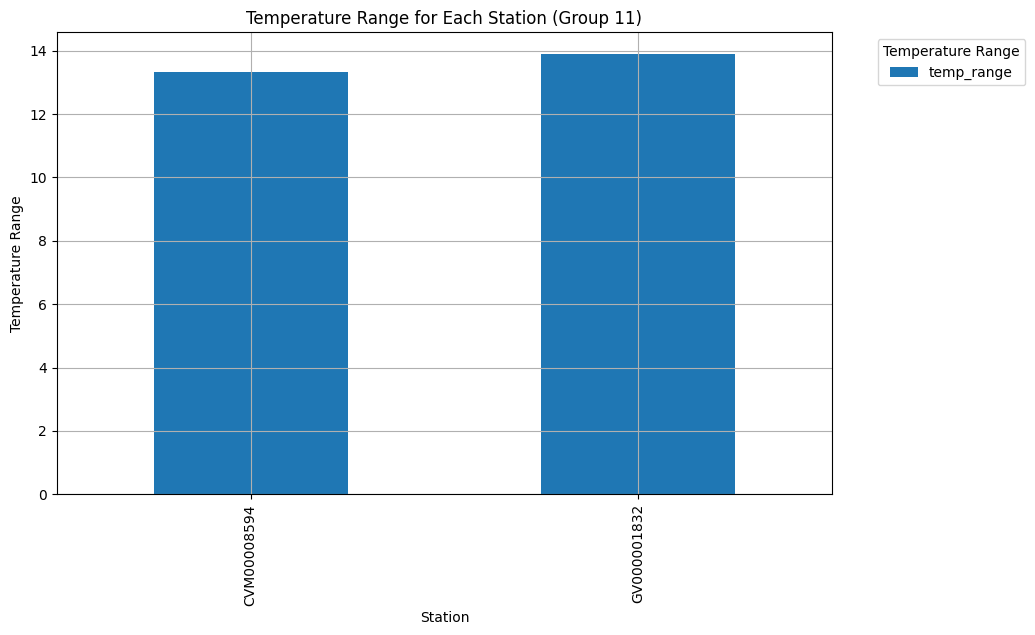

In [42]:
#Provide a plot of the temperature range for each station as stations grouped into ten groups
group_size = len(stations) // 10

for i in range(0, len(stations), group_size):
      # Get the stations in this group
      group_stations = stations[i:i+group_size]
      
      # Filter the data for this group of stations
      group_data = df_temp_range[df_temp_range['STATION'].isin(group_stations)]
      
      # Plot the data
      group_data.plot(kind='bar', x='STATION', figsize=(10, 6))
      plt.title('Temperature Range for Each Station (Group ' + str(i//group_size + 1) + ')')
      plt.xlabel('Station')
      plt.ylabel('Temperature Range')
      plt.legend(title='Temperature Range', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.show()

In [43]:
#find the station with the highest temperature range and the station with the lowest temperature range
print("Station with the highest temperature range:")
print(df_temp_range.loc[df_temp_range['temp_range'].idxmax()])
print("\nStation with the lowest temperature range:")
print(df_temp_range.loc[df_temp_range['temp_range'].idxmin()])

Station with the highest temperature range:
STATION       NG000061017
temp_range          34.44
Name: 36, dtype: object

Station with the lowest temperature range:
STATION       IVM00065594
temp_range          10.55
Name: 19, dtype: object


# Q14. How much does the temperature vary at each station?

In [44]:
# Calculate the temperature variance for each station
temp_variance = df_melted.groupby('STATION')['temperature'].var()

print("Temperature variances:")
print(temp_variance)

Temperature variances:
STATION
BN000005319     5.471778
BN000005344     2.419836
BN000065306     8.695920
BN000065335     3.975041
BNM00065330     4.990959
                 ...    
UV000065516     9.120835
UVM00065503    10.146653
UVM00065505     9.329796
UVM00065510     7.505639
UVM00065518     8.000278
Name: temperature, Length: 72, dtype: float64


In [45]:
#make it a dataframe
df_temp_variance = pd.DataFrame({'temp_variance': temp_variance}).reset_index()
df_temp_variance.head()

STATION  temp_variance
0  BN000005319       5.471778
1  BN000005344       2.419836
2  BN000065306       8.695920
3  BN000065335       3.975041
4  BNM00065330       4.990959

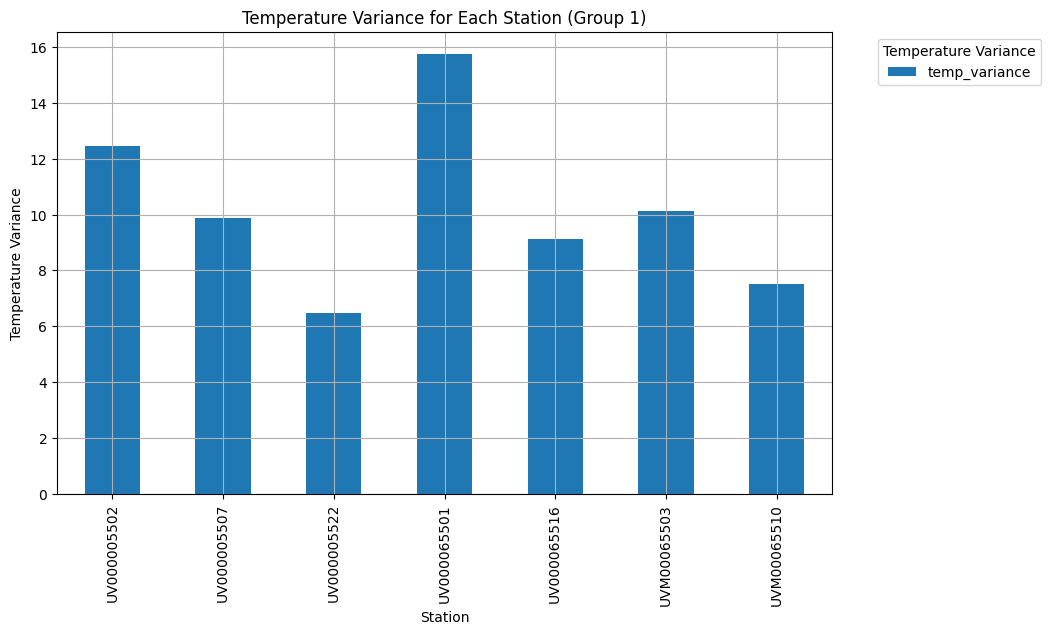

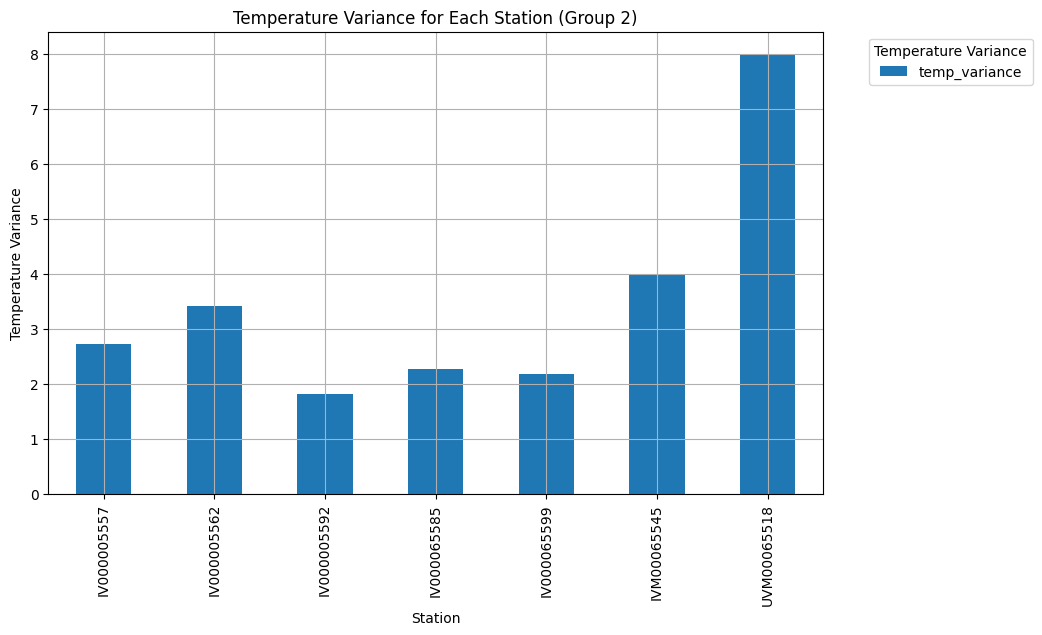

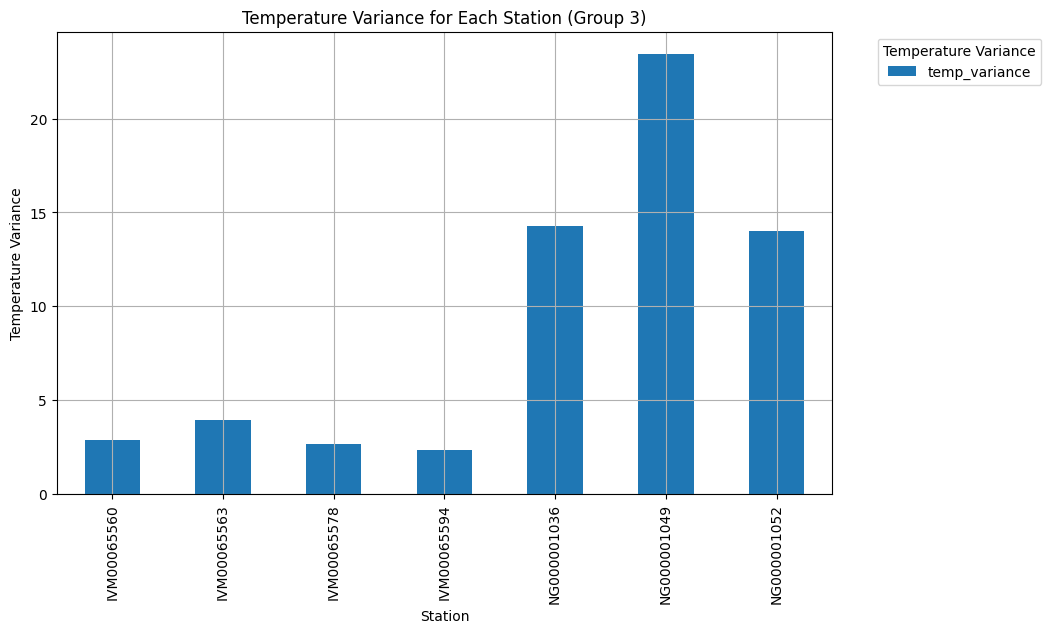

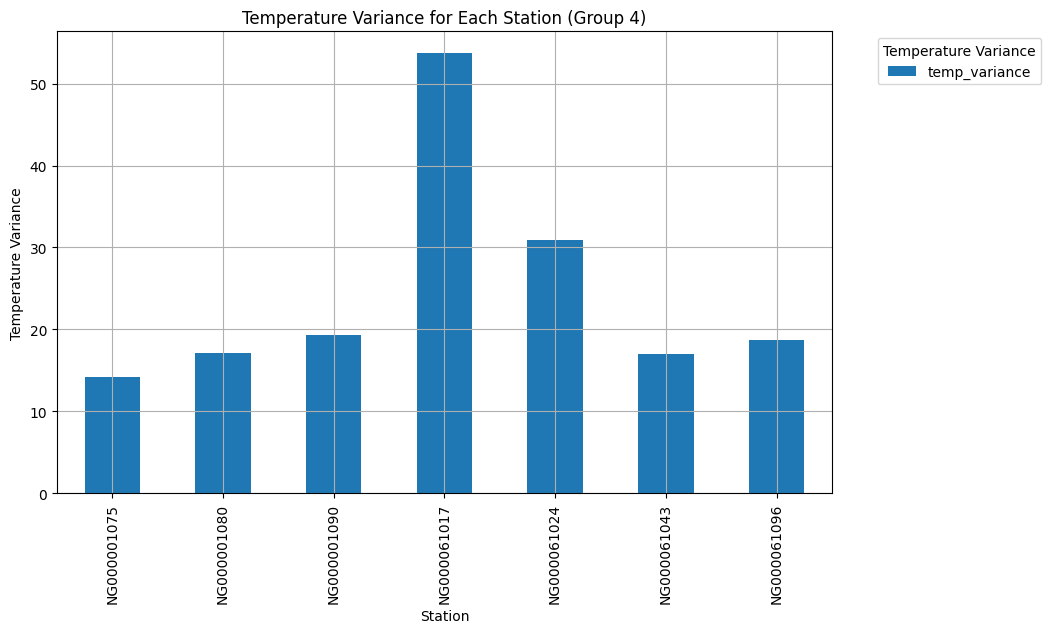

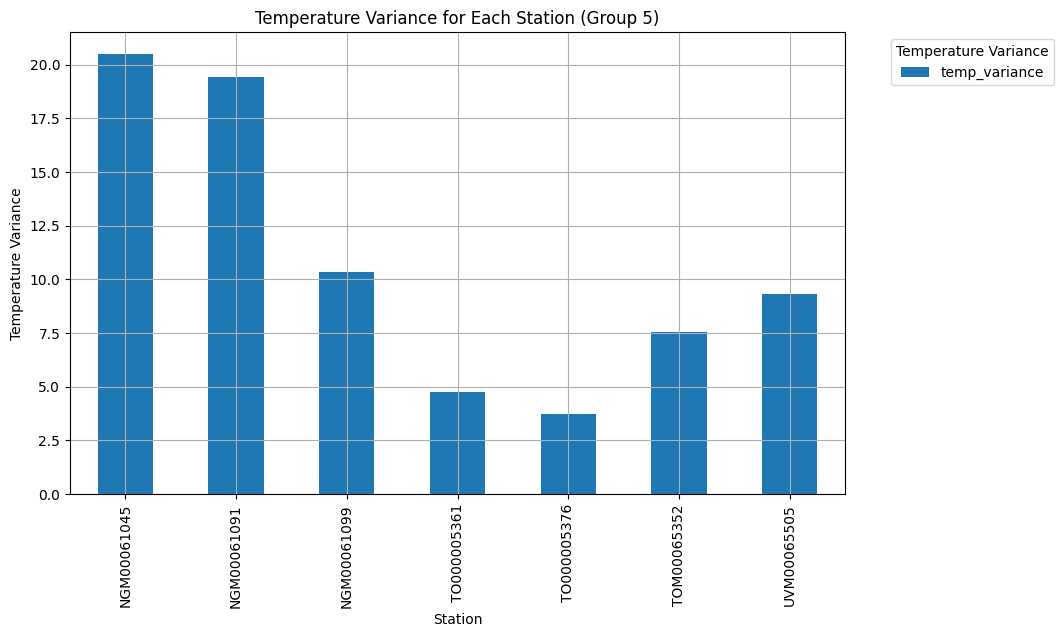

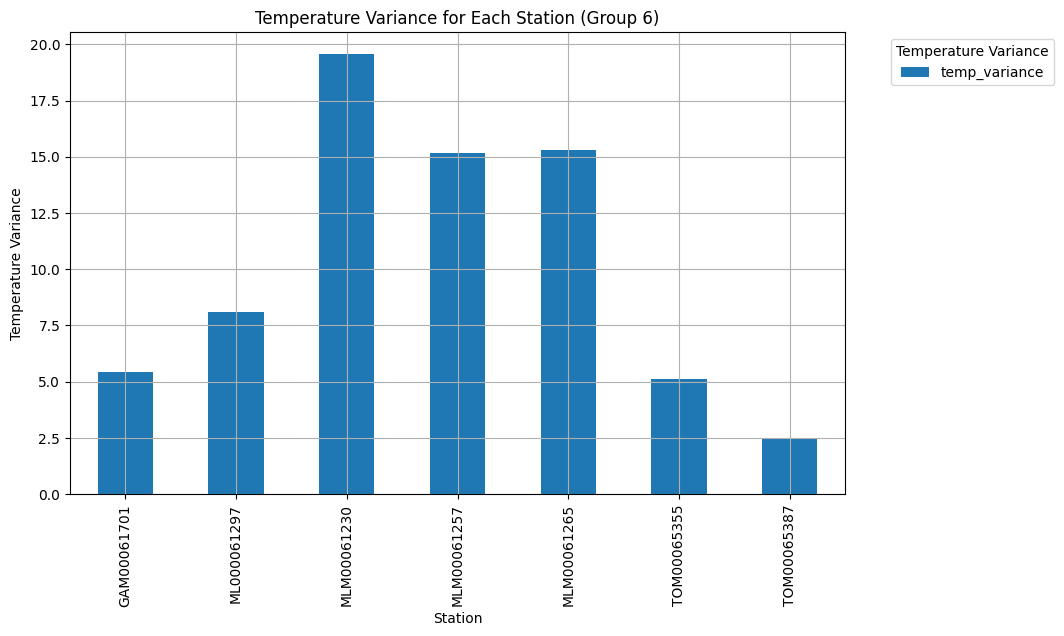

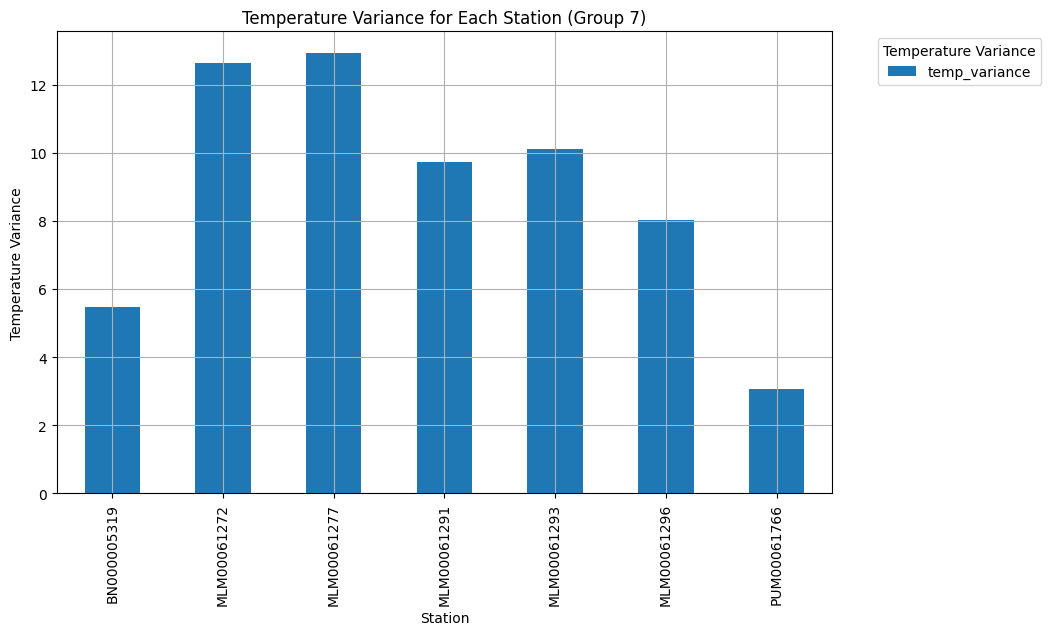

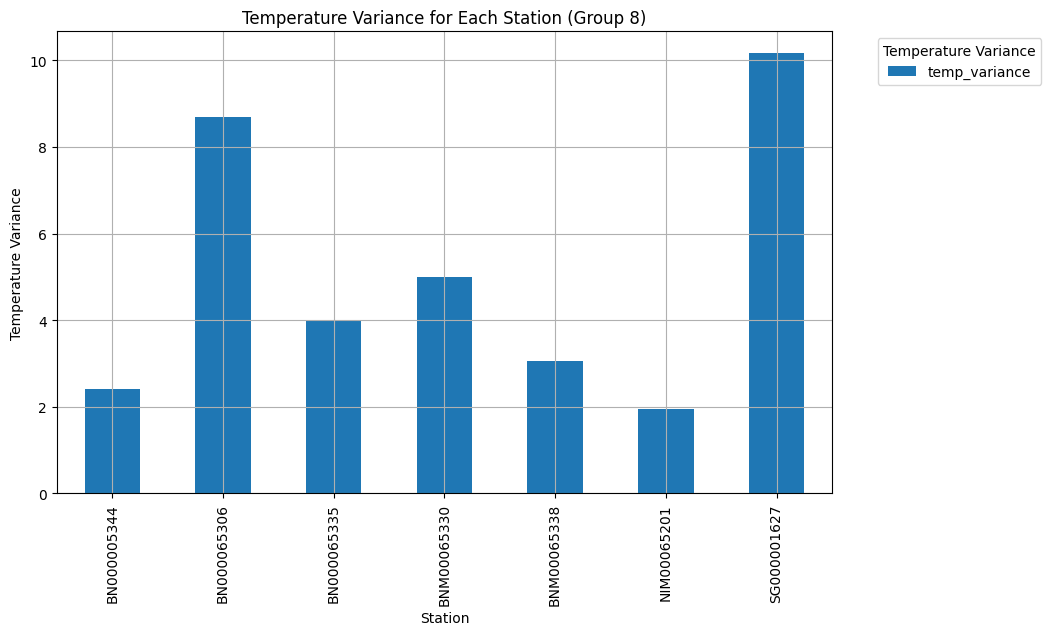

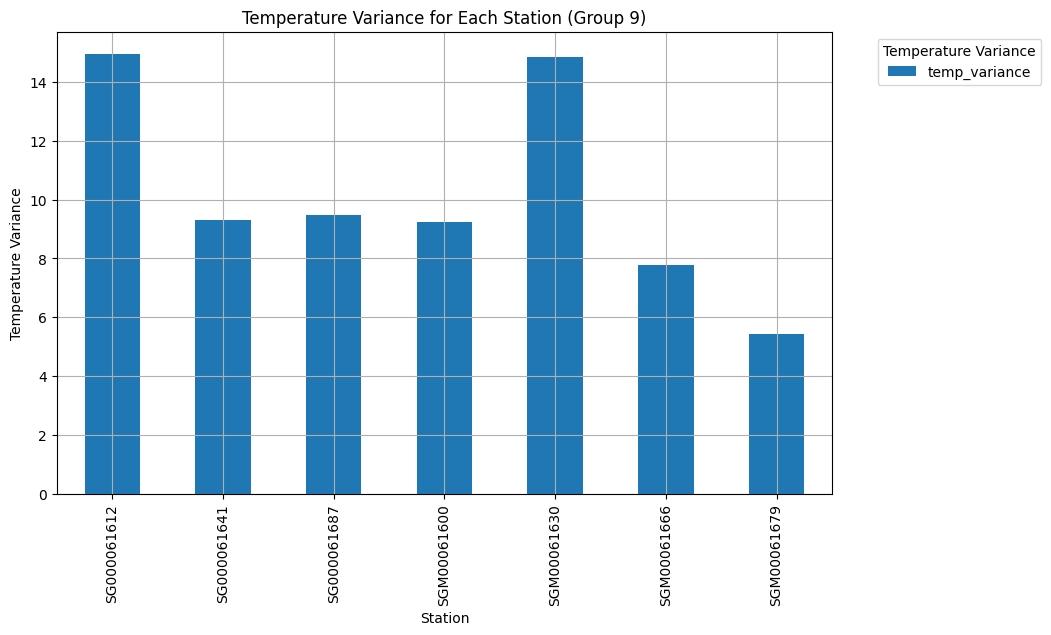

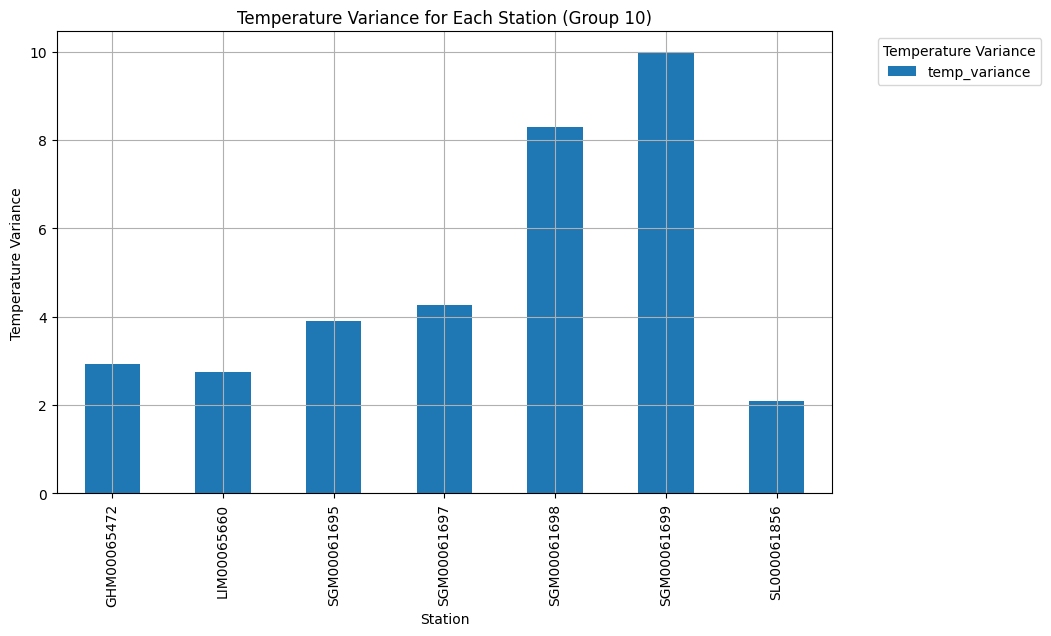

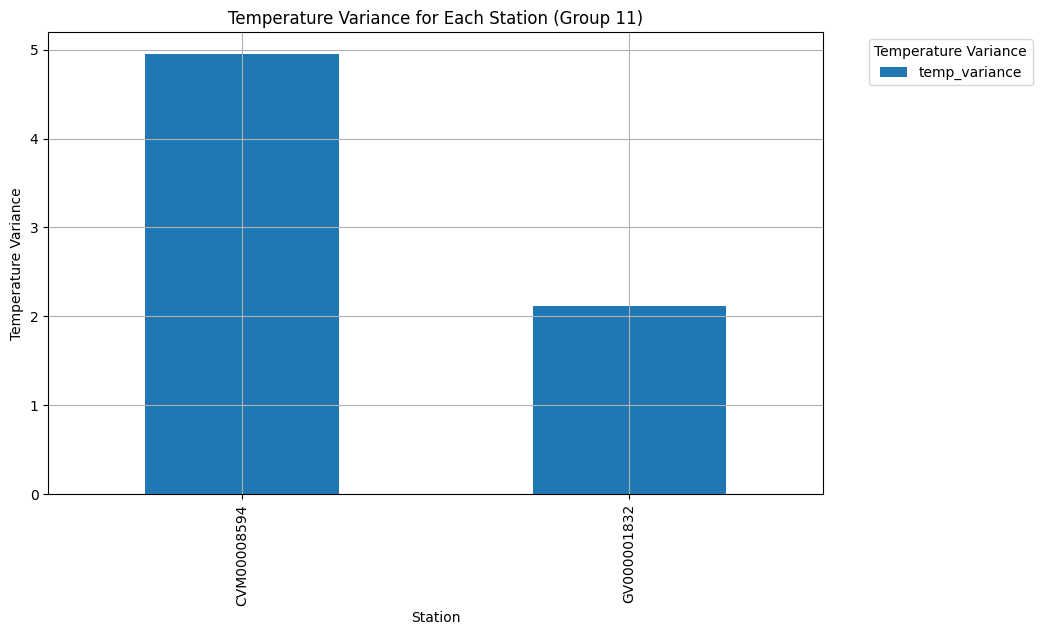

In [47]:
#Provide a plot of the temperature variance for each station as stations grouped into ten groups
group_size = len(stations) // 10

for i in range(0, len(stations), group_size):
      # Get the stations in this group
      group_stations = stations[i:i+group_size]
      
      # Filter the data for this group of stations
      group_data = df_temp_variance[df_temp_variance['STATION'].isin(group_stations)]
      
      # Plot the data
      group_data.plot(kind='bar', x='STATION', figsize=(10, 6))
      plt.title('Temperature Variance for Each Station (Group ' + str(i//group_size + 1) + ')')
      plt.xlabel('Station')
      plt.ylabel('Temperature Variance')
      plt.legend(title='Temperature Variance', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.show()

In [49]:
#find the station with the highest temperature variance and the station with the lowest temperature variance
print("Station with the highest temperature variance:")
print(df_temp_variance.loc[df_temp_variance['temp_variance'].idxmax()])
print("\nStation with the lowest temperature variance:")
print(df_temp_variance.loc[df_temp_variance['temp_variance'].idxmin()])

Station with the highest temperature variance:
STATION          NG000061017
temp_variance      53.691072
Name: 36, dtype: object

Station with the lowest temperature variance:
STATION          IV000005592
temp_variance       1.815304
Name: 12, dtype: object


# Q15. What is the standard deviation of temperature at each station?

In [50]:
# Calculate the temperature standard deviation for each station
temp_std = df_melted.groupby('STATION')['temperature'].std()

print("Temperature standard deviations:")
print(temp_std)

Temperature standard deviations:
STATION
BN000005319    2.339183
BN000005344    1.555582
BN000065306    2.948885
BN000065335    1.993751
BNM00065330    2.234045
                 ...   
UV000065516    3.020072
UVM00065503    3.185381
UVM00065505    3.054472
UVM00065510    2.739642
UVM00065518    2.828476
Name: temperature, Length: 72, dtype: float64


In [51]:
#make it a dataframe
df_temp_std = pd.DataFrame({'temp_std': temp_std}).reset_index()
df_temp_std.head()

STATION  temp_std
0  BN000005319  2.339183
1  BN000005344  1.555582
2  BN000065306  2.948885
3  BN000065335  1.993751
4  BNM00065330  2.234045

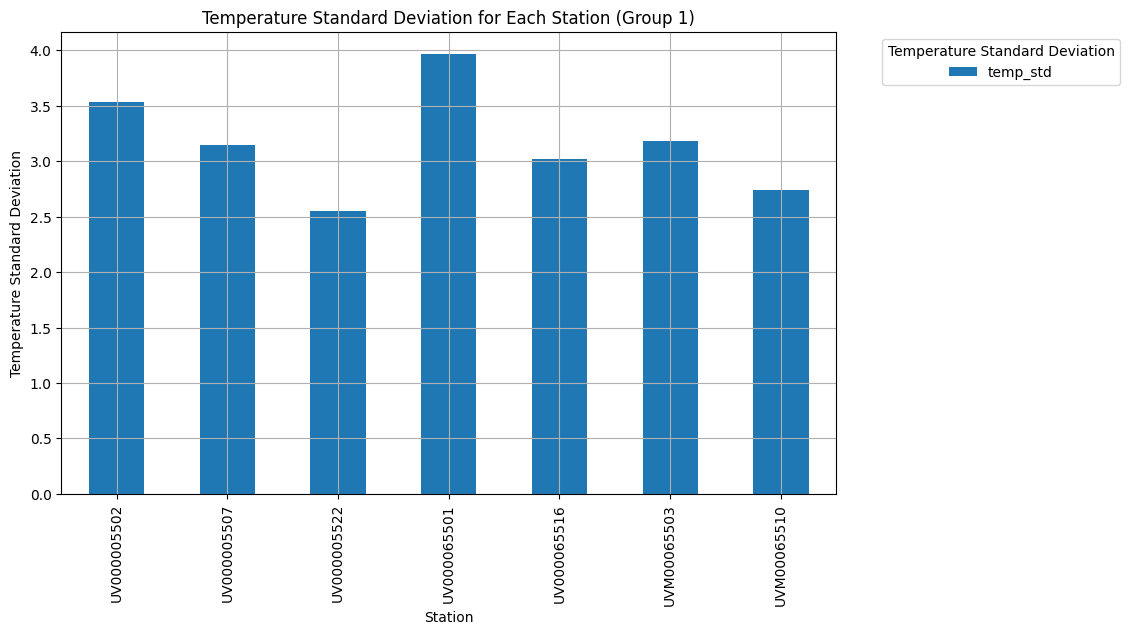

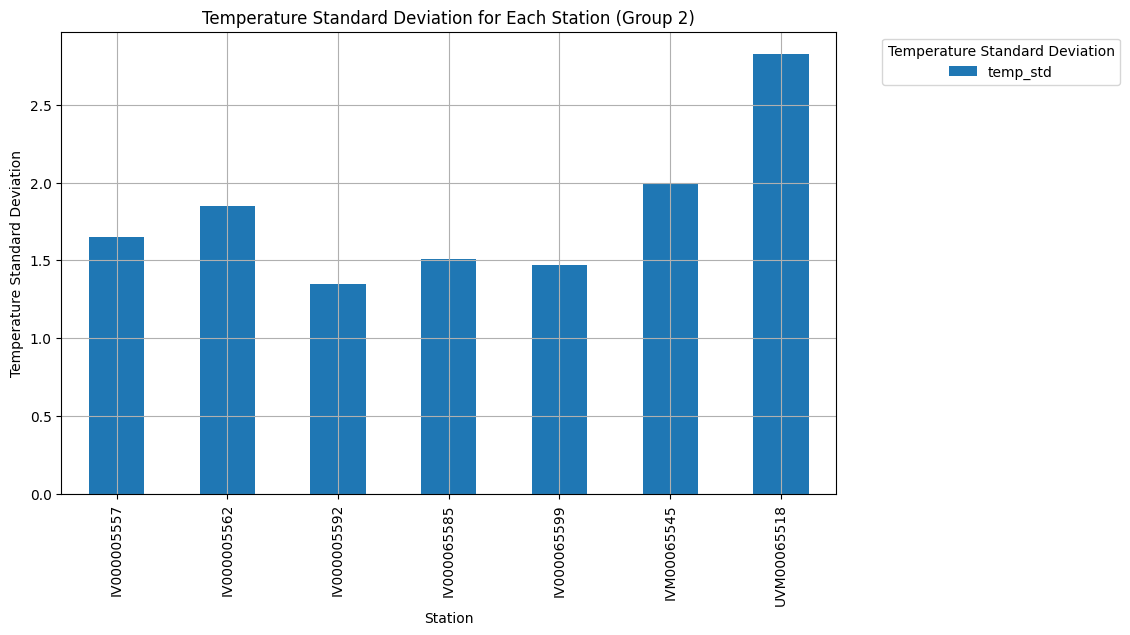

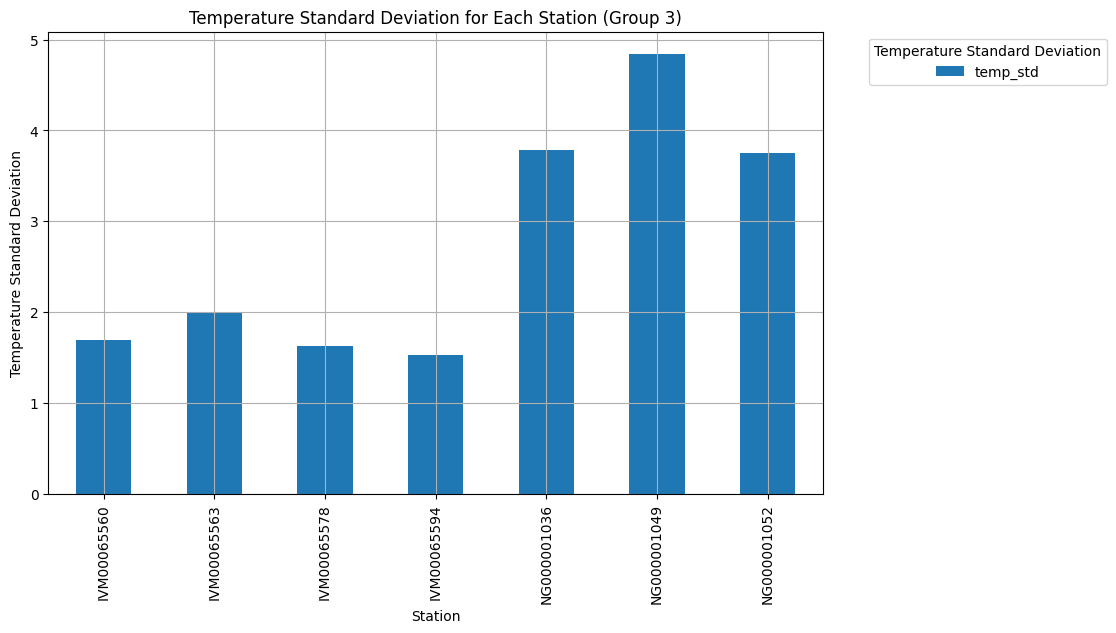

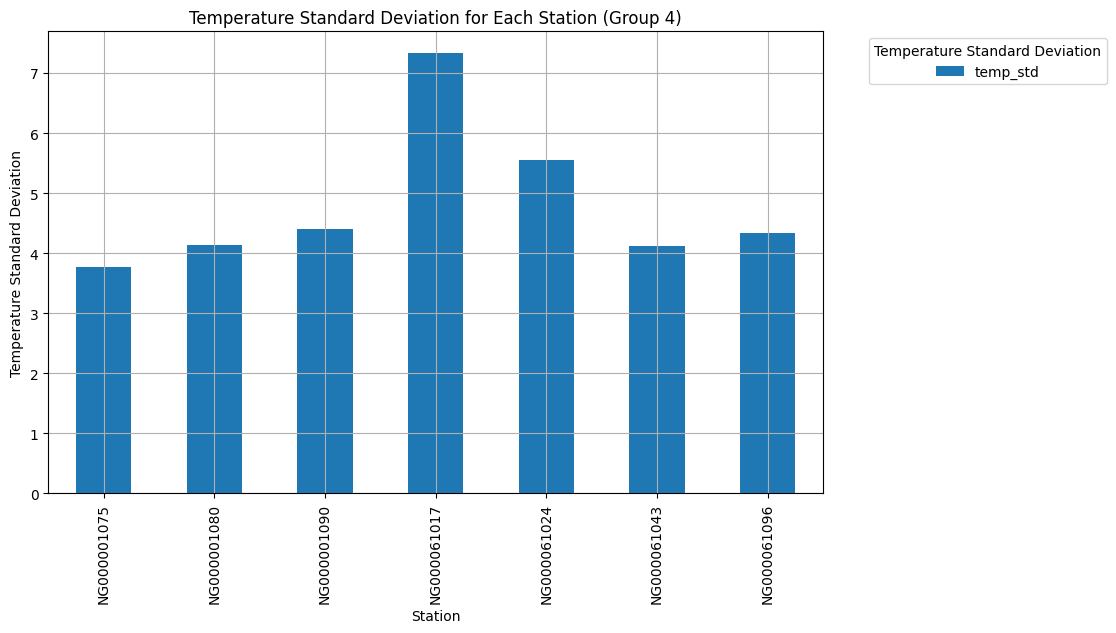

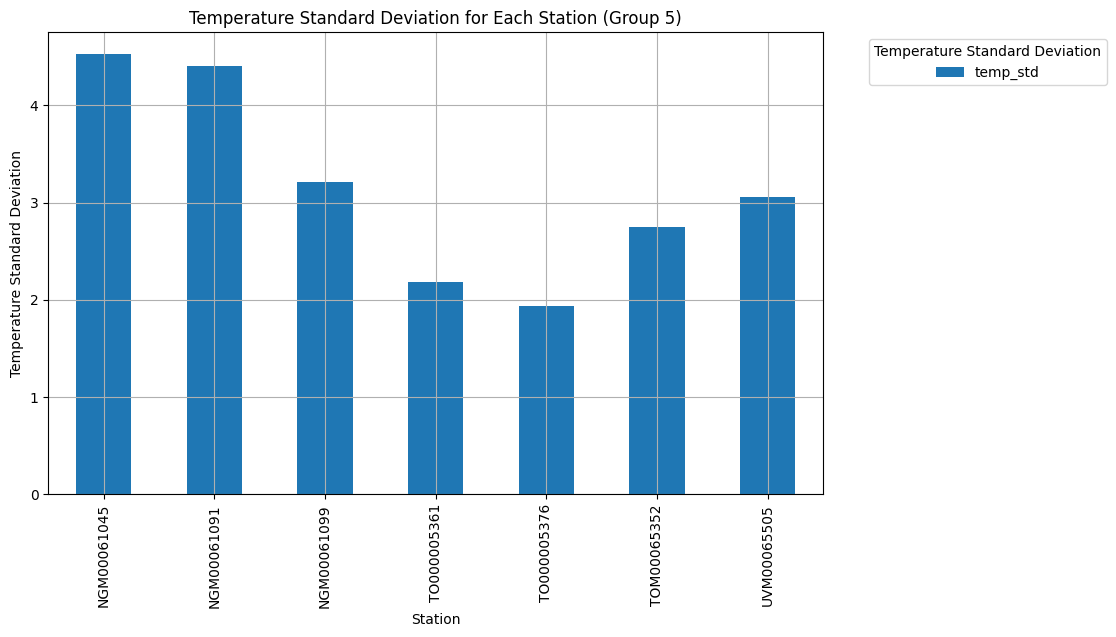

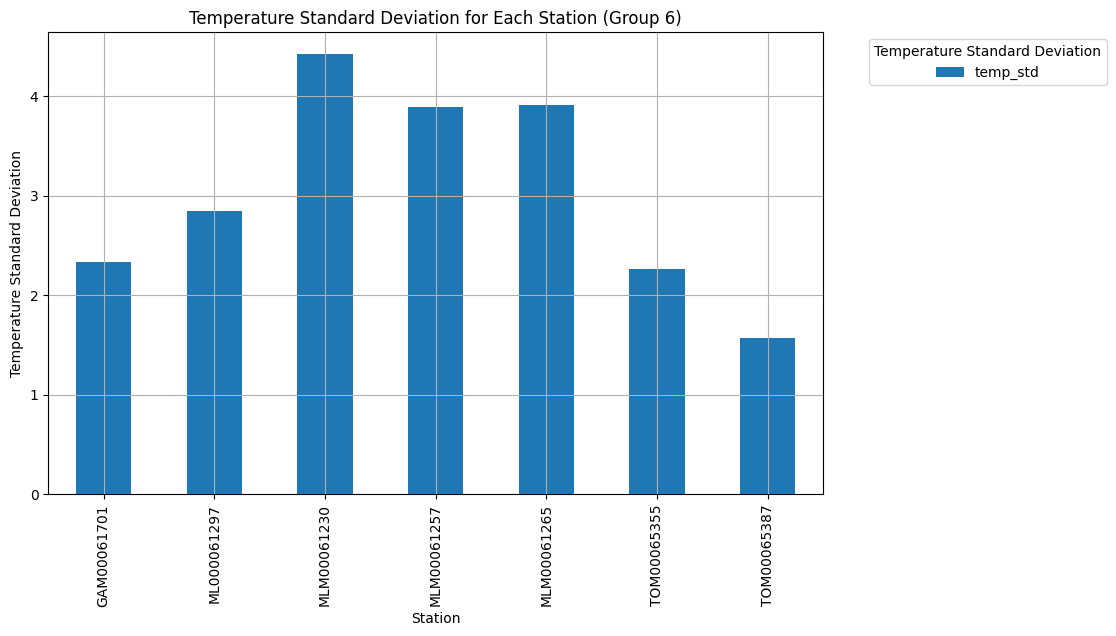

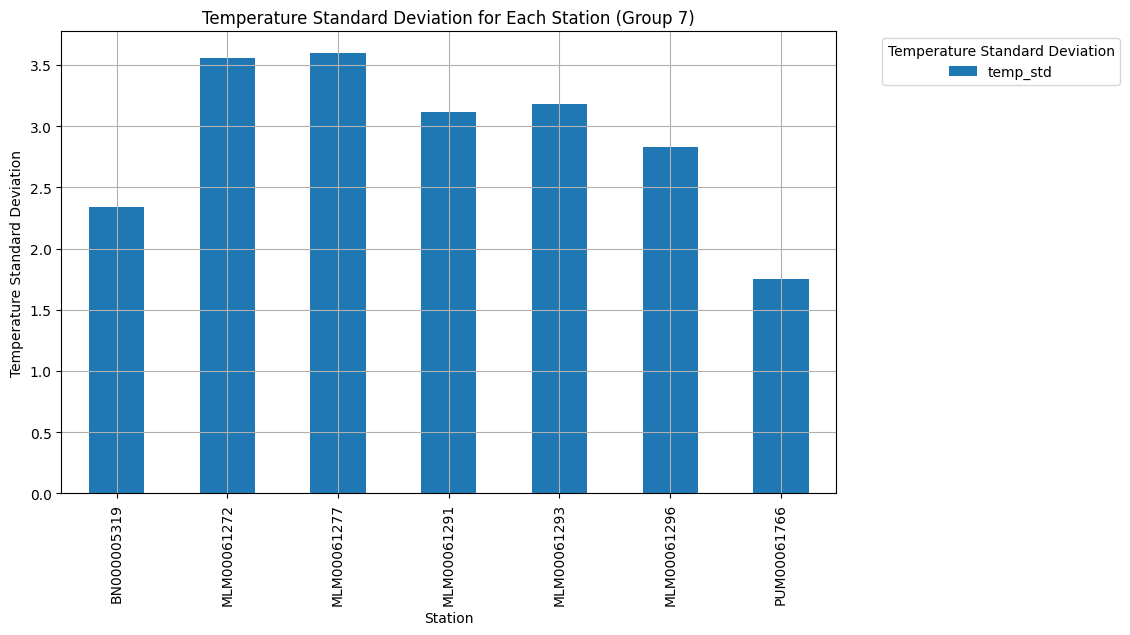

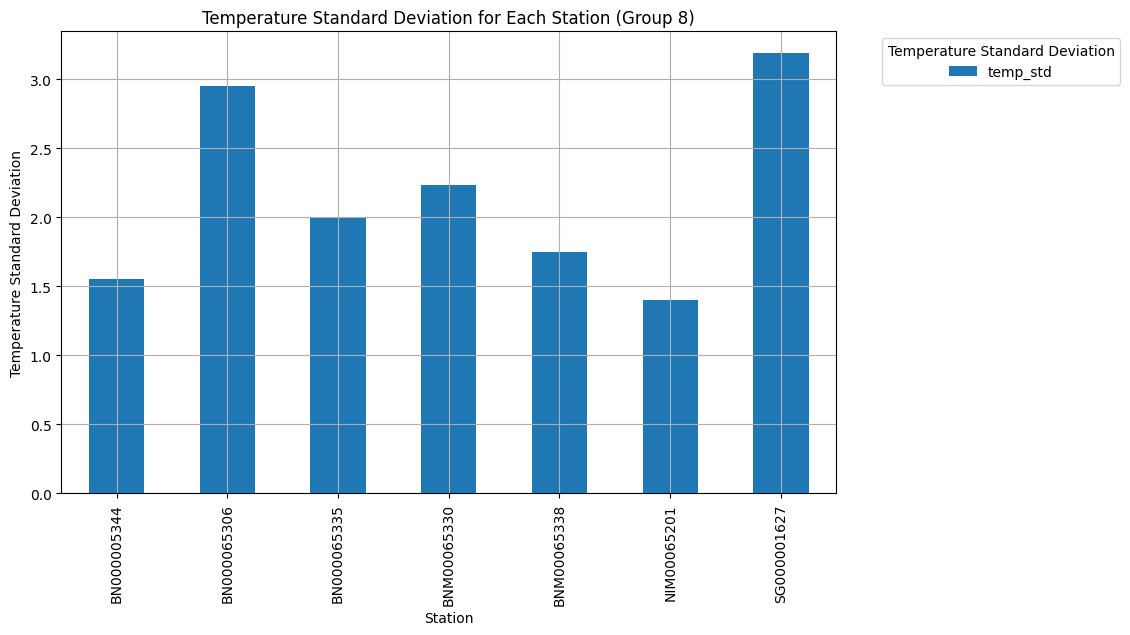

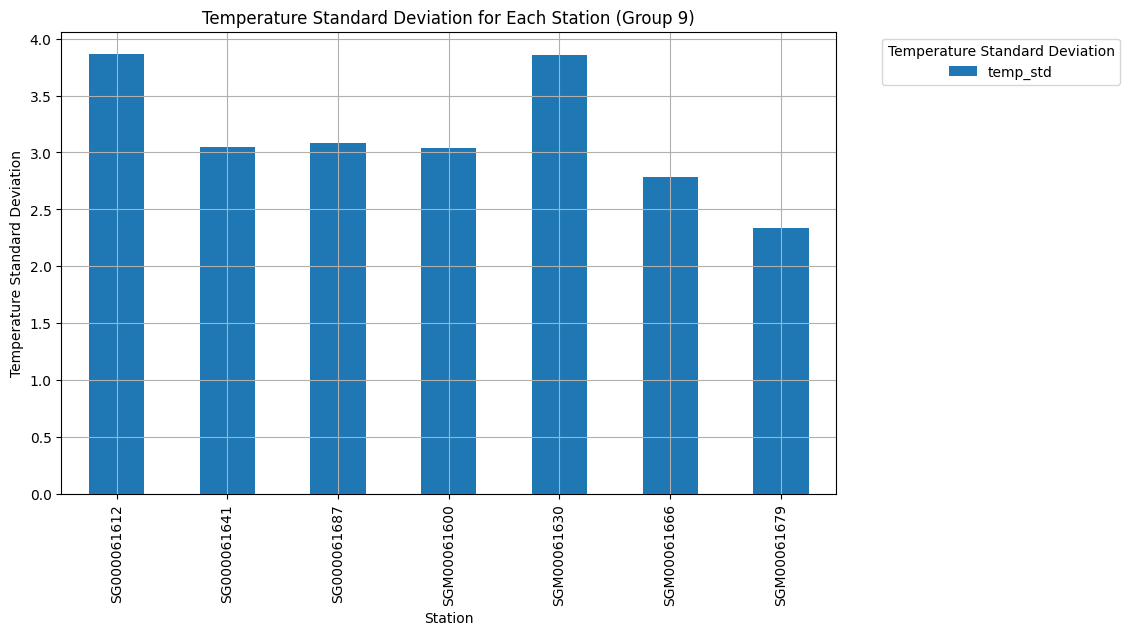

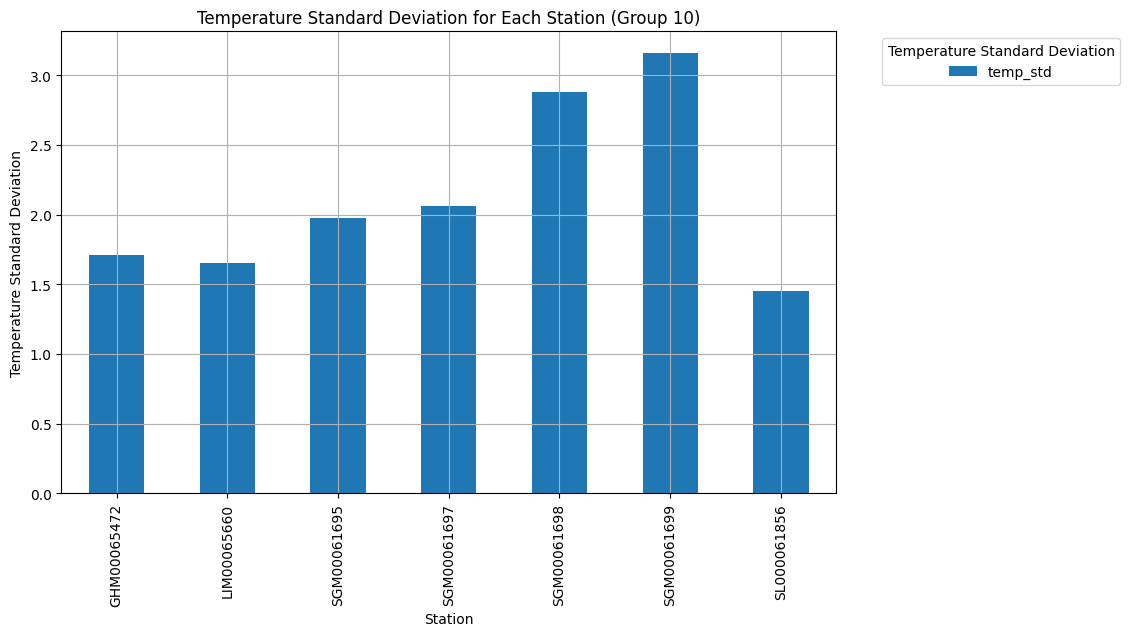

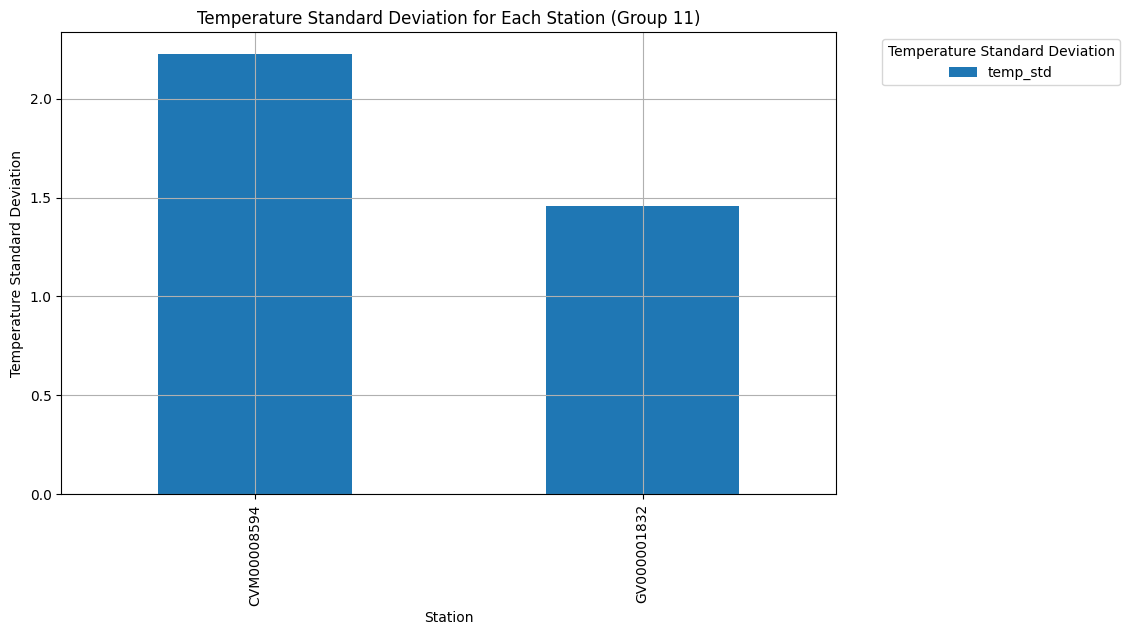

In [52]:
#Provide a plot of the temperature standard deviation for each station as stations grouped into ten groups
group_size = len(stations) // 10

for i in range(0, len(stations), group_size):
      # Get the stations in this group
      group_stations = stations[i:i+group_size]
      
      # Filter the data for this group of stations
      group_data = df_temp_std[df_temp_std['STATION'].isin(group_stations)]
      
      # Plot the data
      group_data.plot(kind='bar', x='STATION', figsize=(10, 6))
      plt.title('Temperature Standard Deviation for Each Station (Group ' + str(i//group_size + 1) + ')')
      plt.xlabel('Station')
      plt.ylabel('Temperature Standard Deviation')
      plt.legend(title='Temperature Standard Deviation', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.show()

In [53]:
#find the station with the highest temperature standard deviation and the station with the lowest temperature standard deviation

print("Station with the highest temperature standard deviation:")
print(df_temp_std.loc[df_temp_std['temp_std'].idxmax()])
print("\nStation with the lowest temperature standard deviation:")
print(df_temp_std.loc[df_temp_std['temp_std'].idxmin()])

Station with the highest temperature standard deviation:
STATION     NG000061017
temp_std       7.327419
Name: 36, dtype: object

Station with the lowest temperature standard deviation:
STATION     IV000005592
temp_std       1.347332
Name: 12, dtype: object


# Q16. What are the quartiles of the temperature at each station?

In [54]:
# Calculate the temperature quartiles for each station
temp_quartiles = df_melted.groupby('STATION')['temperature'].quantile([0.25, 0.5, 0.75])

print("Temperature quartiles:")
print(temp_quartiles)

Temperature quartiles:
STATION          
BN000005319  0.25    25.00
             0.50    26.67
             0.75    28.33
BN000005344  0.25    26.11
             0.50    27.78
                     ...  
UVM00065510  0.50    27.78
             0.75    29.44
UVM00065518  0.25    26.11
             0.50    27.22
             0.75    30.00
Name: temperature, Length: 216, dtype: float64


In [55]:
#make it a dataframe
df_temp_quartiles = pd.DataFrame({'temp_quartiles': temp_quartiles}).reset_index()
df_temp_quartiles.head()

STATION  level_1  temp_quartiles
0  BN000005319     0.25           25.00
1  BN000005319     0.50           26.67
2  BN000005319     0.75           28.33
3  BN000005344     0.25           26.11
4  BN000005344     0.50           27.78

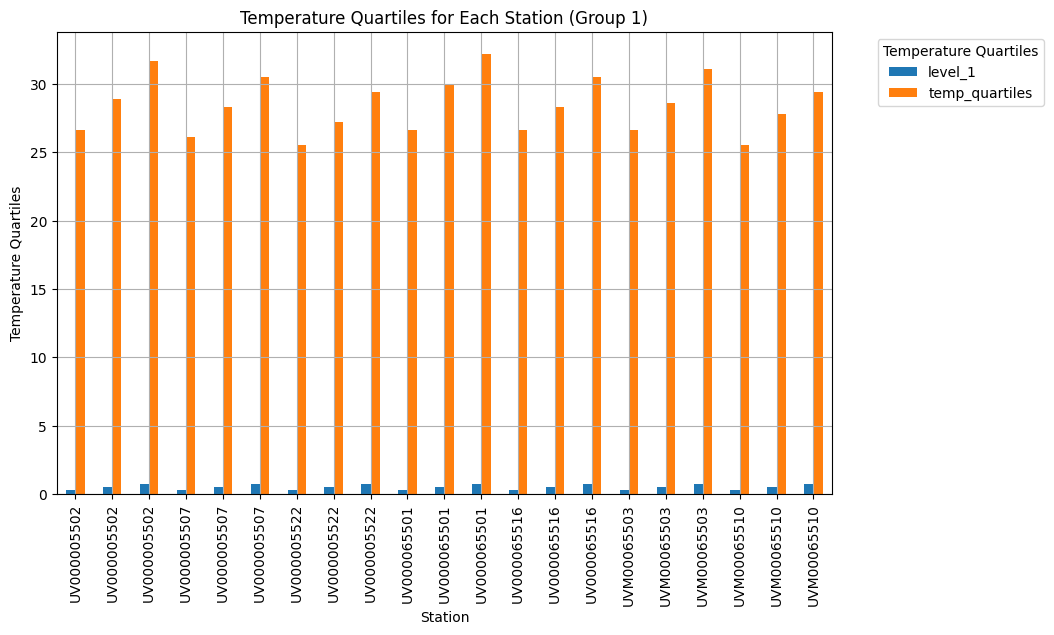

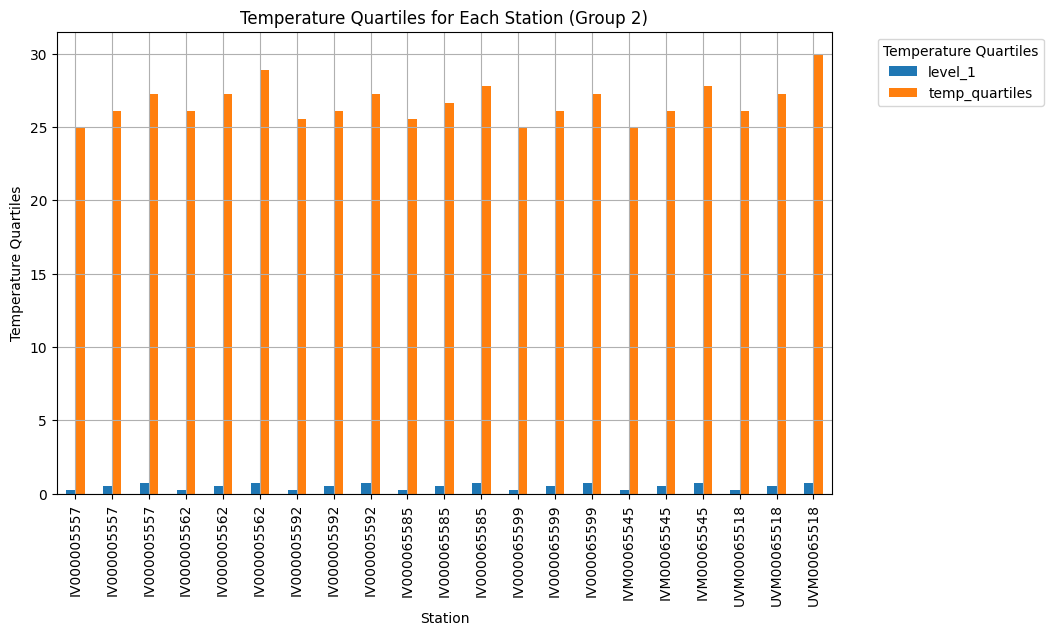

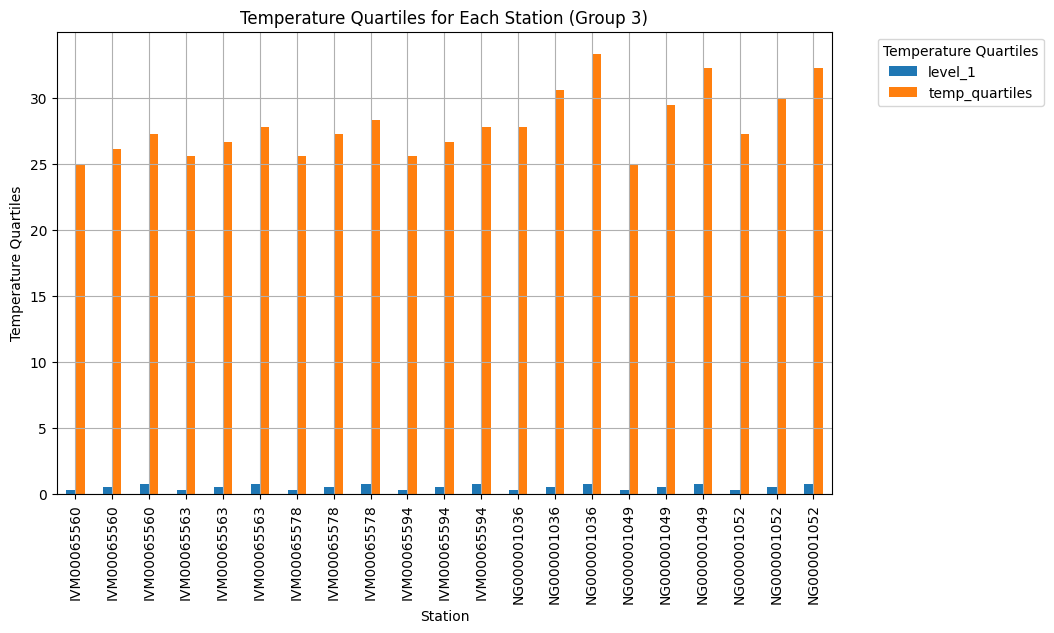

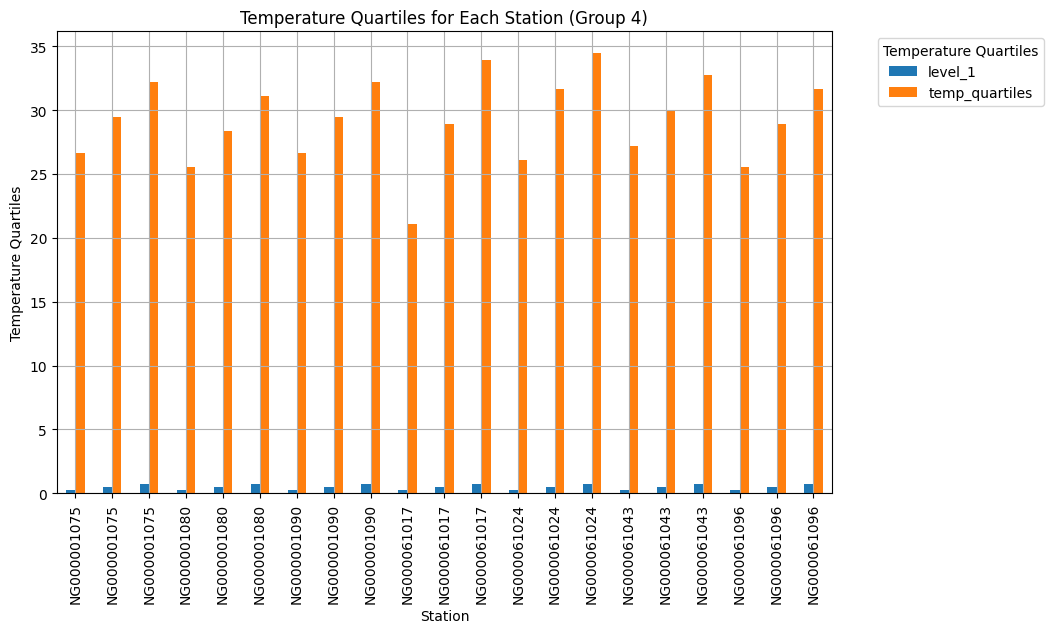

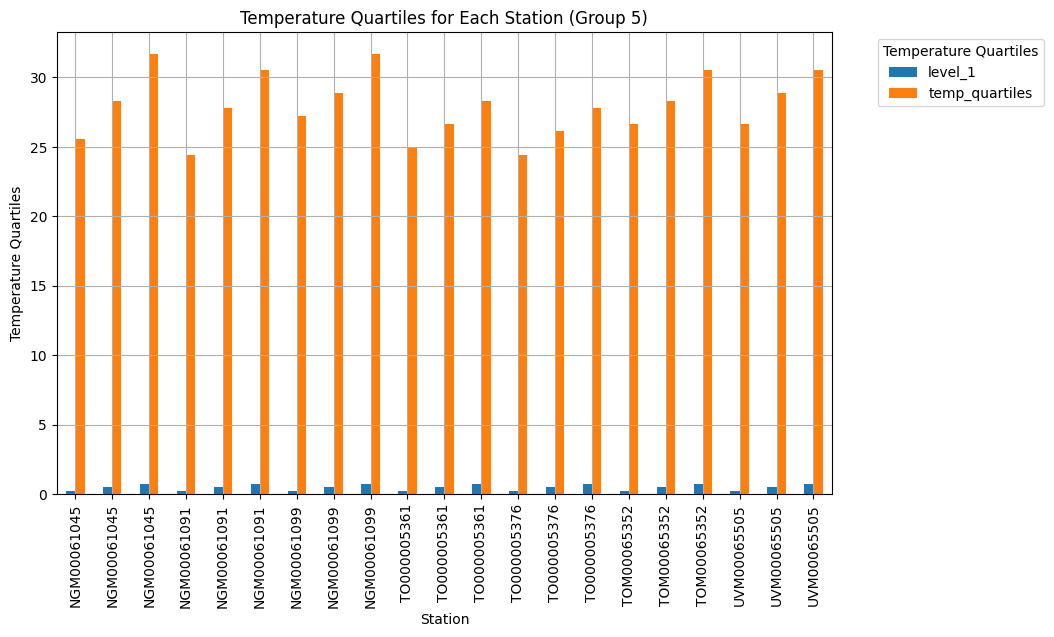

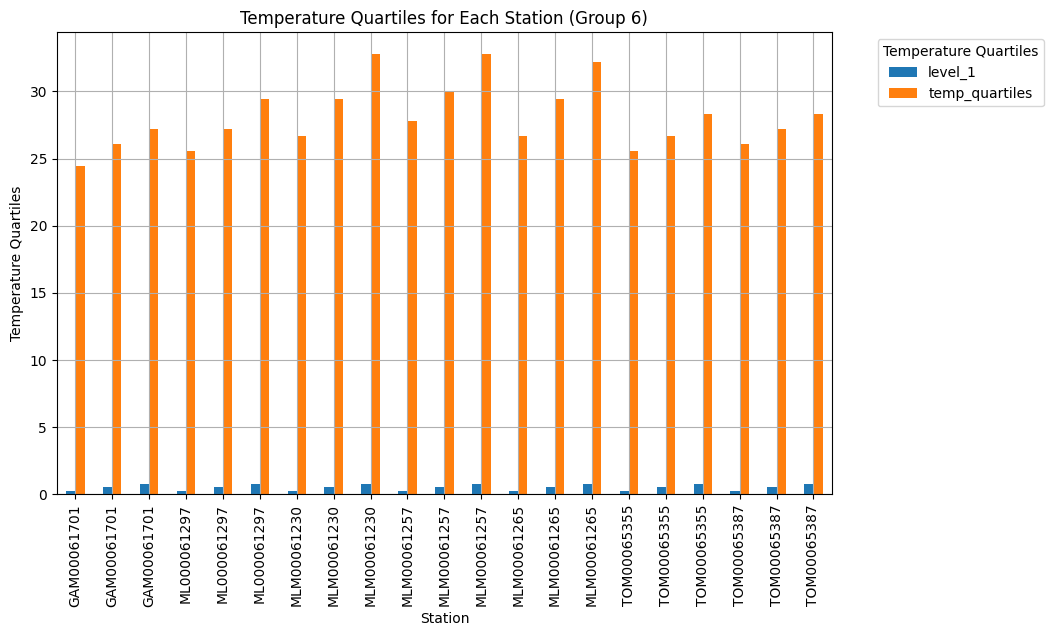

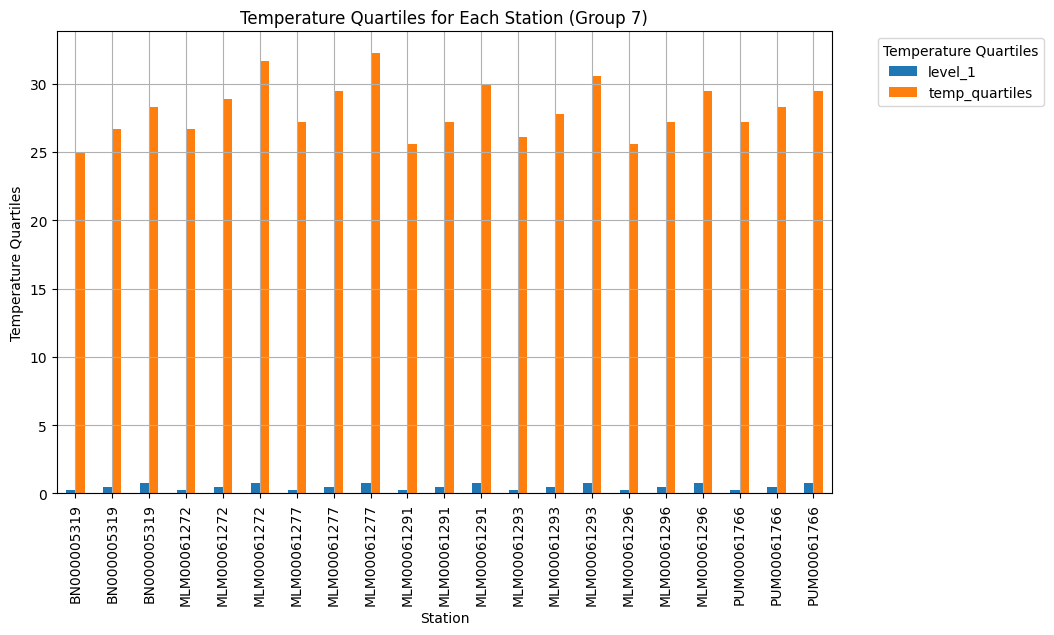

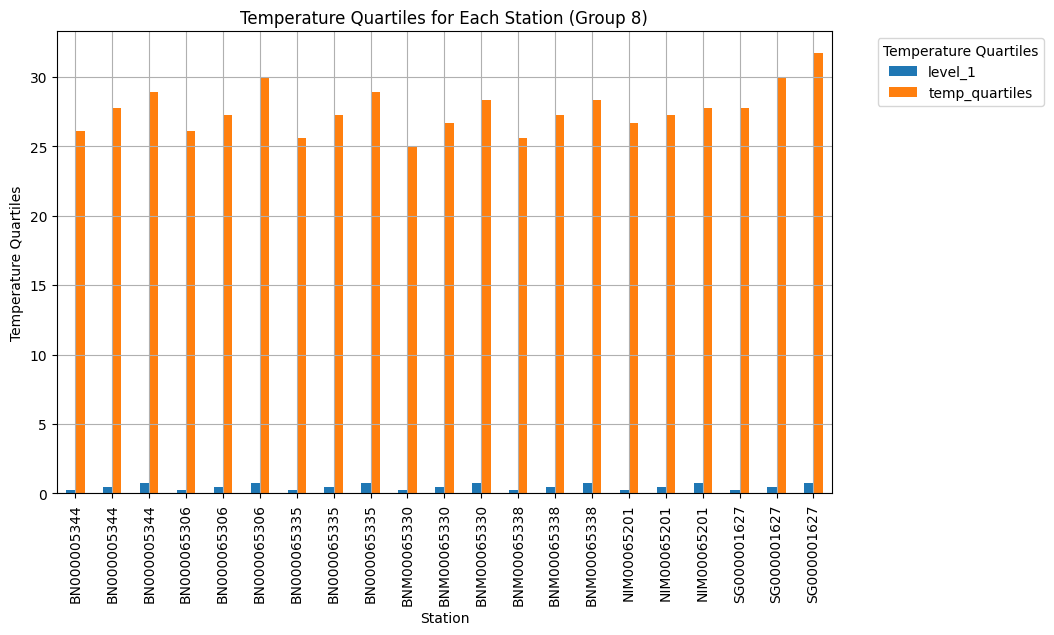

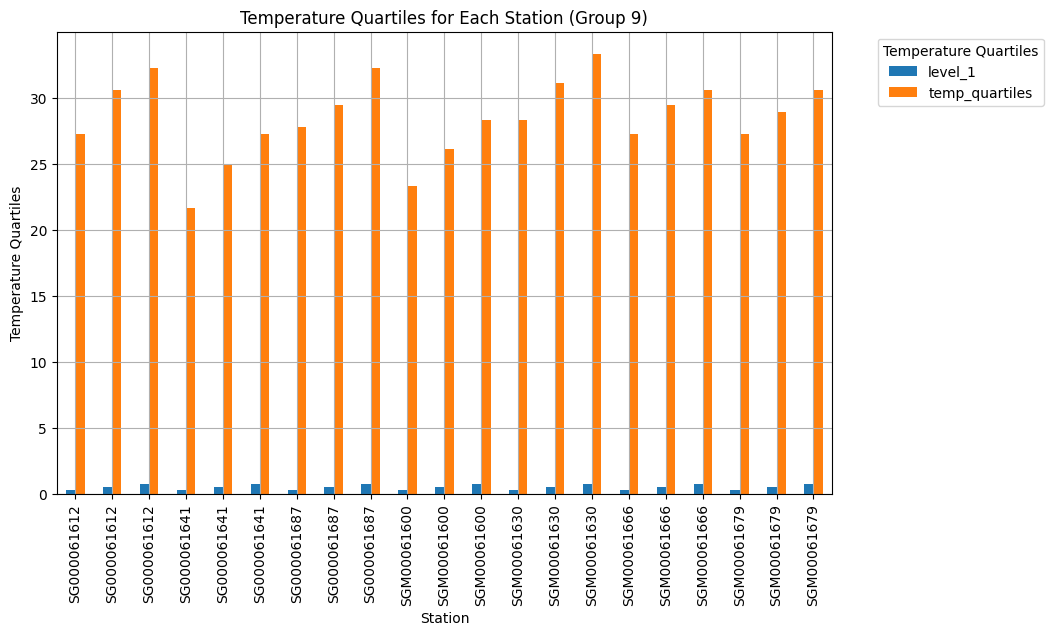

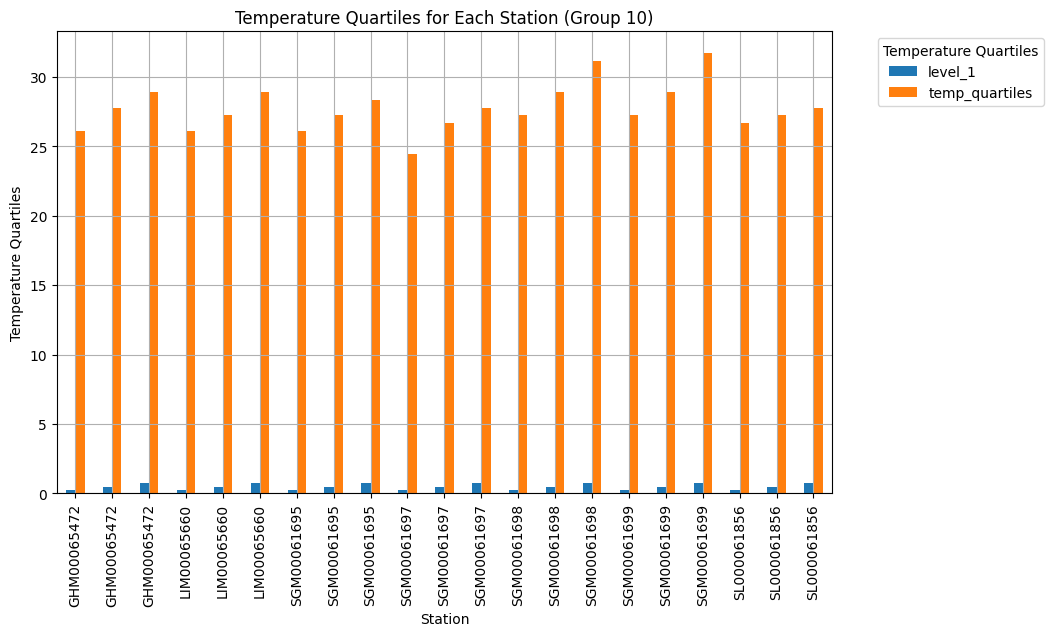

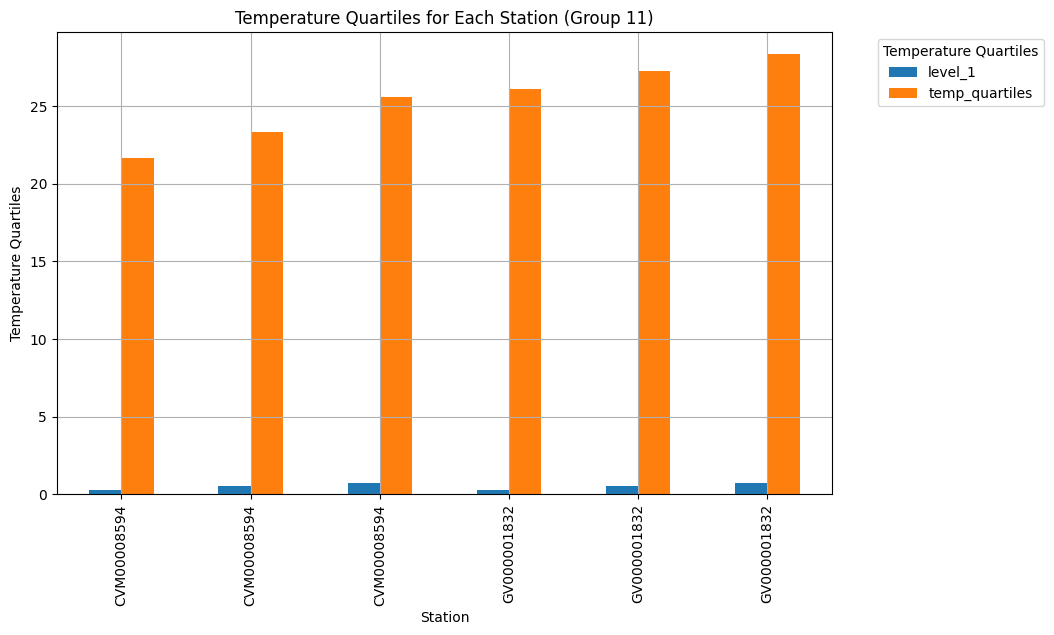

In [56]:
#Provide a plot of the temperature quartiles for each station as stations grouped into ten groups
group_size = len(stations) // 10

for i in range(0, len(stations), group_size):
      # Get the stations in this group
      group_stations = stations[i:i+group_size]
      
      # Filter the data for this group of stations
      group_data = df_temp_quartiles[df_temp_quartiles['STATION'].isin(group_stations)]
      
      # Plot the data
      group_data.plot(kind='bar', x='STATION', figsize=(10, 6))
      plt.title('Temperature Quartiles for Each Station (Group ' + str(i//group_size + 1) + ')')
      plt.xlabel('Station')
      plt.ylabel('Temperature Quartiles')
      plt.legend(title='Temperature Quartiles', bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.grid(True)
      plt.show()

In [58]:
#find the station with the highest temperature quartiles and the station with the lowest temperature quartiles
print("Station with the highest temperature quartiles:")
print(df_temp_quartiles.loc[df_temp_quartiles['temp_quartiles'].idxmax()])
print("\nStation with the lowest temperature quartiles:")
print(df_temp_quartiles.loc[df_temp_quartiles['temp_quartiles'].idxmin()])

Station with the highest temperature quartiles:
STATION           NG000061024
level_1                  0.75
temp_quartiles          34.44
Name: 113, dtype: object

Station with the lowest temperature quartiles:
STATION           NG000061017
level_1                  0.25
temp_quartiles          21.11
Name: 108, dtype: object


### "Highest Quartile: Station NG000061024 with a temperature quartile of 34.44.
#### Lowest Quartile: Station NG000061017 with a temperature quartile of 21.11.

#### Highest Standard Deviation: Station NG000061017 with a temperature standard deviation of 7.33.
#### Lowest Standard Deviation: Station IV000005592 with a temperature standard deviation of 1.35.

#### Highest Variance: Station NG000061017 with a temperature variance of 53.69.
#### Lowest Variance: Station IV000005592 with a temperature variance of 1.82.

#### Station NG000061017 has the highest temperature range at 34.44, while station IVM00065594 has the lowest at 10.55.

#### Station NG000061024 experienced the highest temperature, ranging from 12.78 to 42.78 degrees.
#### Station NG000061017 had the lowest temperature range, varying between 6.67 and 41.11 degrees.
#### These findings indicate variability in temperature measures across different stations, highlighting diverse climatic conditions and temperature ranges in the analyzed locations. Station NG000061017 particularly demonstrates significant variability across multiple metrics, including quartiles, standard deviation, variance, and temperature range.